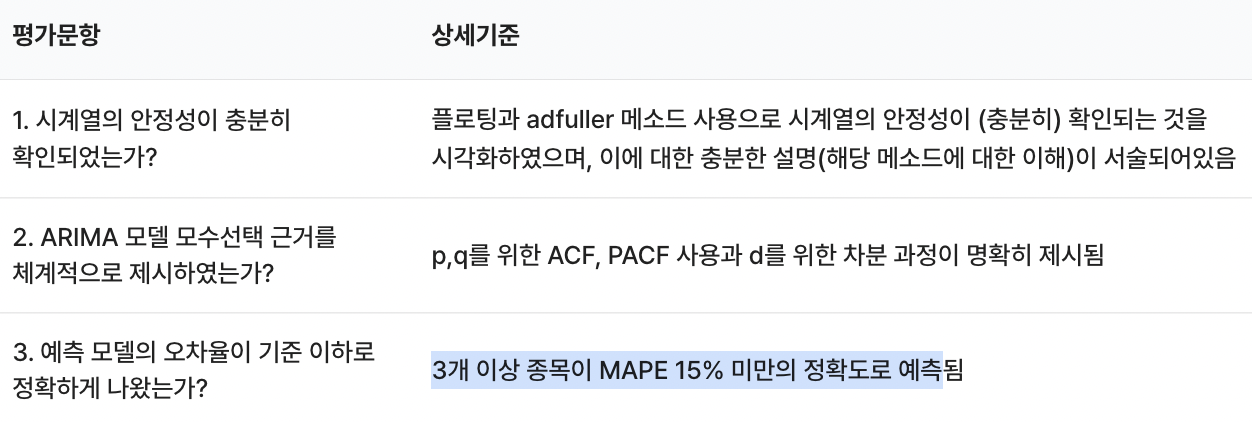

# Samsung Electronics.Co.Ltd. (005930.KS)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn
import statsmodels


import warnings
warnings.filterwarnings('ignore')

sns.set(style= "whitegrid")

In [1]:
import pandas
import sklearn
import statsmodels

In [4]:
pwd

'/aiffel/aiffel/Interactive PYthon NoteBook/7th week'

In [5]:
cd ~

/aiffel


In [2]:
cd ~/aiffel/stock_prediction/data

/aiffel/aiffel/stock_prediction/data


In [7]:
ls

005930.KS.csv@  airline-passengers.csv@  daily-min-temperatures.csv@


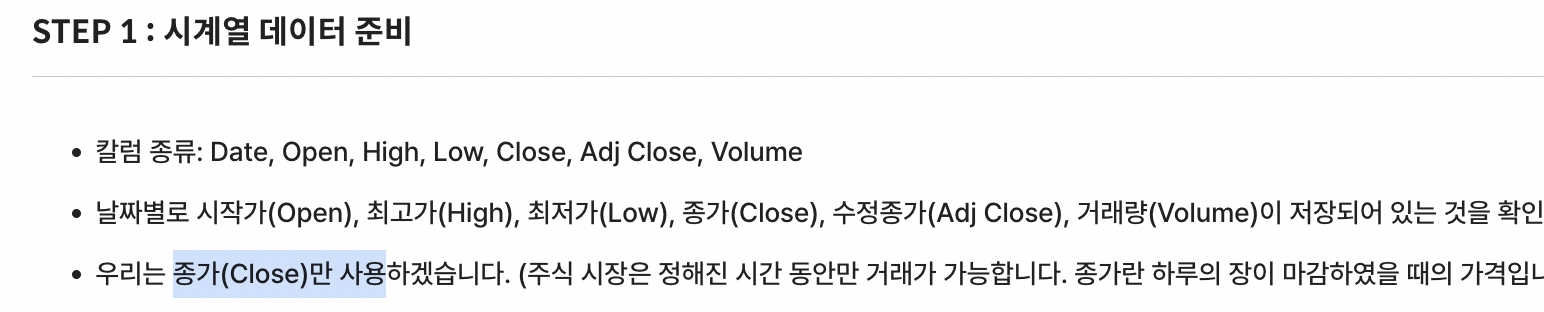

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

##### df.set_index("Date", inplace= True)
index_col= "Date" 깜빡할때 사용

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 2020-05-18 to 2021-05-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7+ KB


In [27]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [28]:
ts = df["Close"]

In [29]:
ts

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
               ...   
2021-05-12    80000.0
2021-05-13    78500.0
2021-05-14    80100.0
2021-05-17    79600.0
2021-05-18    79600.0
Name: Close, Length: 250, dtype: float64

In [30]:
ts.describe()

count      250.000000
mean     68232.800000
std      13100.979613
min      48750.000000
25%      56425.000000
50%      63900.000000
75%      82175.000000
max      91000.000000
Name: Close, dtype: float64

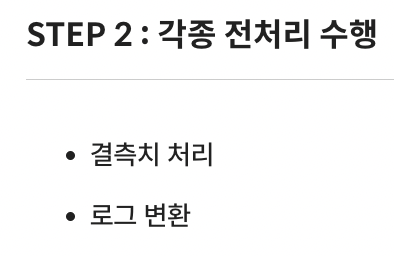

In [31]:
ts.isna().sum()

0

<AxesSubplot:xlabel='Date'>

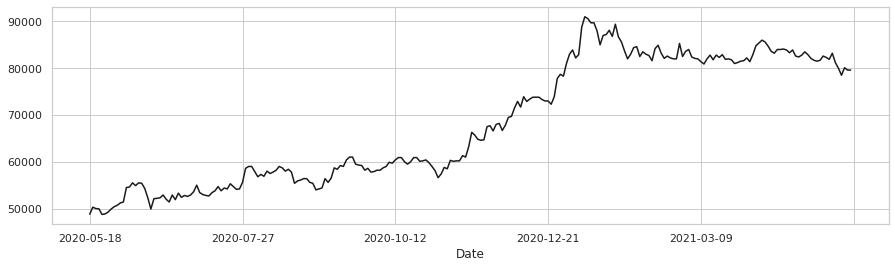

In [33]:
ts.plot(figsize= (15, 4), c= "k")

In [34]:
ts = ts.interpolate(method='time')
ts

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
               ...   
2021-05-12    80000.0
2021-05-13    78500.0
2021-05-14    80100.0
2021-05-17    79600.0
2021-05-18    79600.0
Name: Close, Length: 250, dtype: float64

In [35]:
ts.isna()

Date
2020-05-18    False
2020-05-19    False
2020-05-20    False
2020-05-21    False
2020-05-22    False
              ...  
2021-05-12    False
2021-05-13    False
2021-05-14    False
2021-05-17    False
2021-05-18    False
Name: Close, Length: 250, dtype: bool

In [36]:
ts[ts.isna()]

Series([], Name: Close, dtype: float64)

In [4]:
ts_log = np.log(ts)
ts_log

Date
2020-05-18    10.795486
2020-05-19    10.825760
2020-05-20    10.819778
2020-05-21    10.818778
2020-05-22    10.794460
                ...    
2021-05-12    11.289782
2021-05-13    11.270854
2021-05-14    11.291031
2021-05-17    11.284769
2021-05-18    11.284769
Name: Close, Length: 250, dtype: float64

In [38]:
ts_log.describe()

count    250.000000
mean      11.112226
std        0.192683
min       10.794460
25%       10.940667
50%       11.065015
75%       11.316606
max       11.418615
Name: Close, dtype: float64

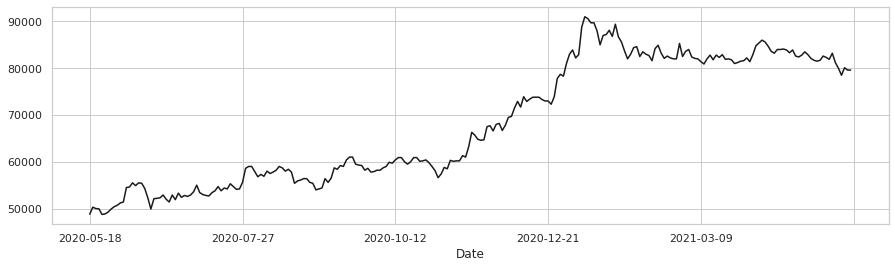

In [41]:
ts.plot(figsize= (15, 4), c= "k");

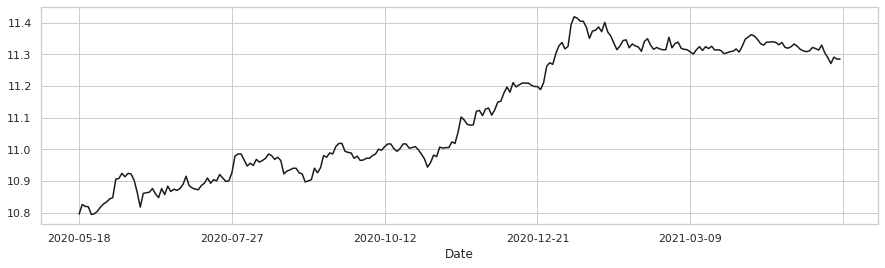

In [40]:
ts_log.plot(figsize= (15, 4), c= "k");

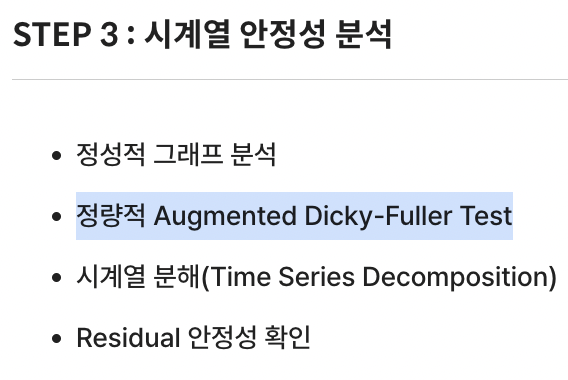

In [12]:
def plot_rolling_statistics(timeseries, window= 12):
    
    rolmean = timeseries.rolling(window= window).mean()  
    # 이동평균 시계열
    rolstd = timeseries.rolling(window= window).std()    
    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color= 'salmon',label= 'Original')    
    mean = plt.plot(rolmean, color= 'k', label= 'Rolling Mean')
    std = plt.plot(rolstd, color= 'darkslategray', label= 'Rolling Std')
    plt.legend(bbox_to_anchor= (1.05, 1), loc= "best", borderaxespad= 0.)
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block= False)  

In [15]:
from matplotlib.pylab import rcParams
plt.rcParams["figure.figsize"] = (15,10)

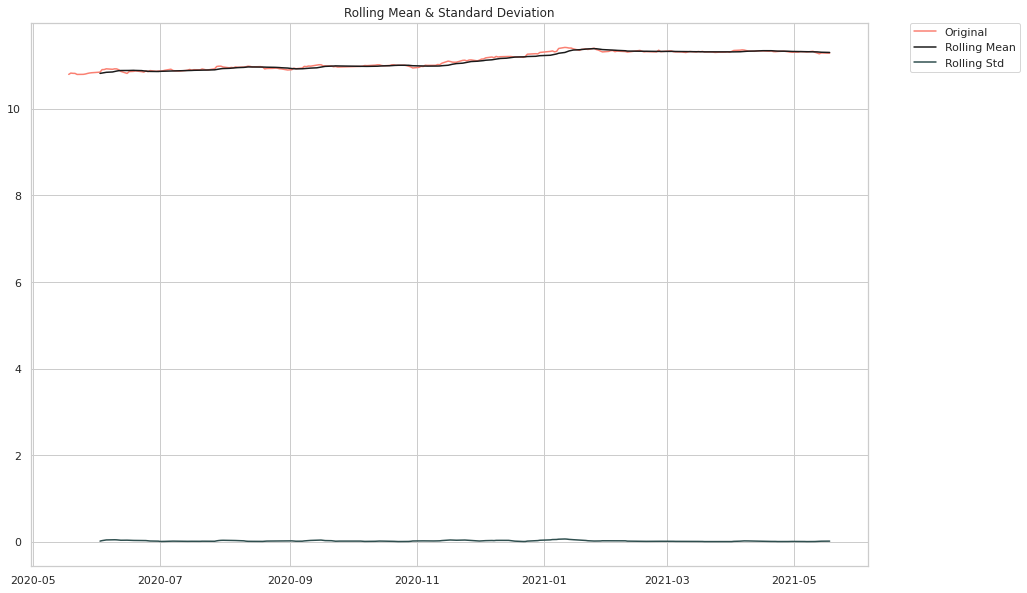

In [16]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
def augmented_dickey_fuller_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')  

    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic',
                                'p-value',
                                '#Lags Used',
                                'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    
    print(dfoutput)

In [57]:
#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [18]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose

model : {"additive", "multiplicative"}, optional  
    Type of seasonal component. Abbreviations are accepted.

In [19]:
decomposition = seasonal_decompose(ts_log, 
                                   model='multiplicative', 
                                   period = 30) 

In [20]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [64]:
trend[trend.isnull()]

Date
2020-05-18   NaN
2020-05-19   NaN
2020-05-20   NaN
2020-05-21   NaN
2020-05-22   NaN
2020-05-25   NaN
2020-05-26   NaN
2020-05-27   NaN
2020-05-28   NaN
2020-05-29   NaN
2020-06-01   NaN
2020-06-02   NaN
2020-06-03   NaN
2020-06-04   NaN
2020-06-05   NaN
2021-04-27   NaN
2021-04-28   NaN
2021-04-29   NaN
2021-04-30   NaN
2021-05-03   NaN
2021-05-04   NaN
2021-05-06   NaN
2021-05-07   NaN
2021-05-10   NaN
2021-05-11   NaN
2021-05-12   NaN
2021-05-13   NaN
2021-05-14   NaN
2021-05-17   NaN
2021-05-18   NaN
Name: trend, dtype: float64

In [65]:
trend.isnull().sum()

30

In [67]:
seasonal.isnull().sum()

0

In [71]:
residual[residual.isnull()]

Date
2020-05-18   NaN
2020-05-19   NaN
2020-05-20   NaN
2020-05-21   NaN
2020-05-22   NaN
2020-05-25   NaN
2020-05-26   NaN
2020-05-27   NaN
2020-05-28   NaN
2020-05-29   NaN
2020-06-01   NaN
2020-06-02   NaN
2020-06-03   NaN
2020-06-04   NaN
2020-06-05   NaN
2021-04-27   NaN
2021-04-28   NaN
2021-04-29   NaN
2021-04-30   NaN
2021-05-03   NaN
2021-05-04   NaN
2021-05-06   NaN
2021-05-07   NaN
2021-05-10   NaN
2021-05-11   NaN
2021-05-12   NaN
2021-05-13   NaN
2021-05-14   NaN
2021-05-17   NaN
2021-05-18   NaN
Name: resid, dtype: float64

In [70]:
residual.isnull().sum()

30

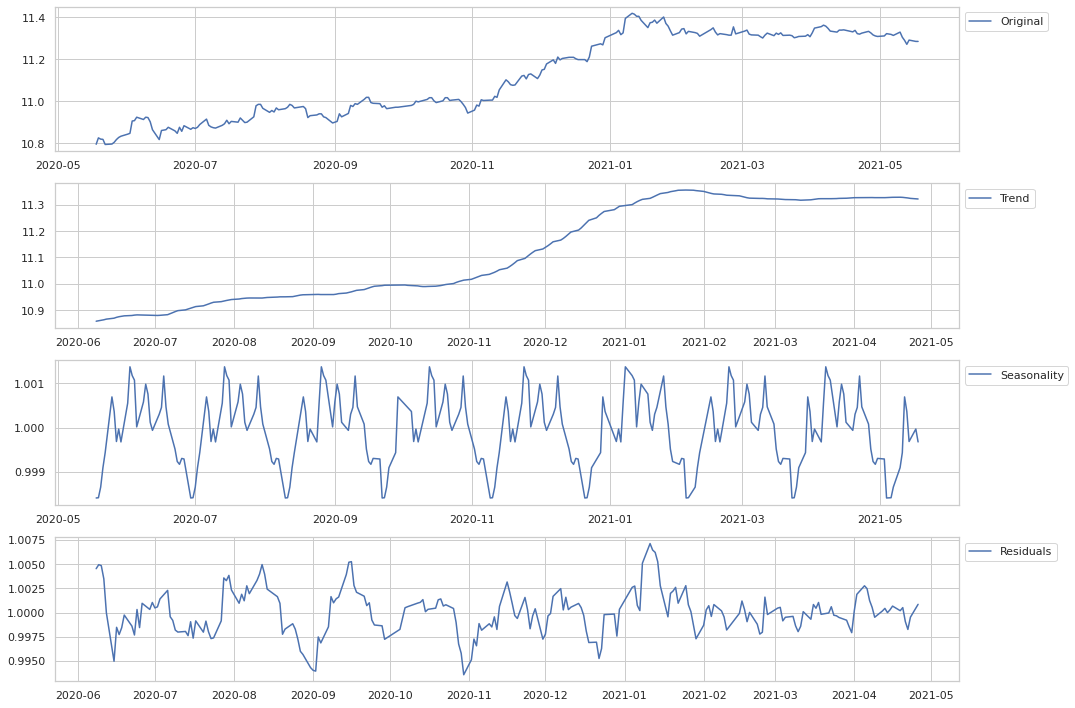

In [21]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(bbox_to_anchor=(1,1), loc= 2)

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(bbox_to_anchor=(1,1), loc= 2)

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(bbox_to_anchor=(1,1), loc= 2)

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(bbox_to_anchor=(1,1), loc= 2)

plt.tight_layout()

In [22]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


In [23]:
train_data, test_data = ts_log[:int(len(ts_log) * 0.9)], ts_log[int(len(ts_log) * 0.9):]

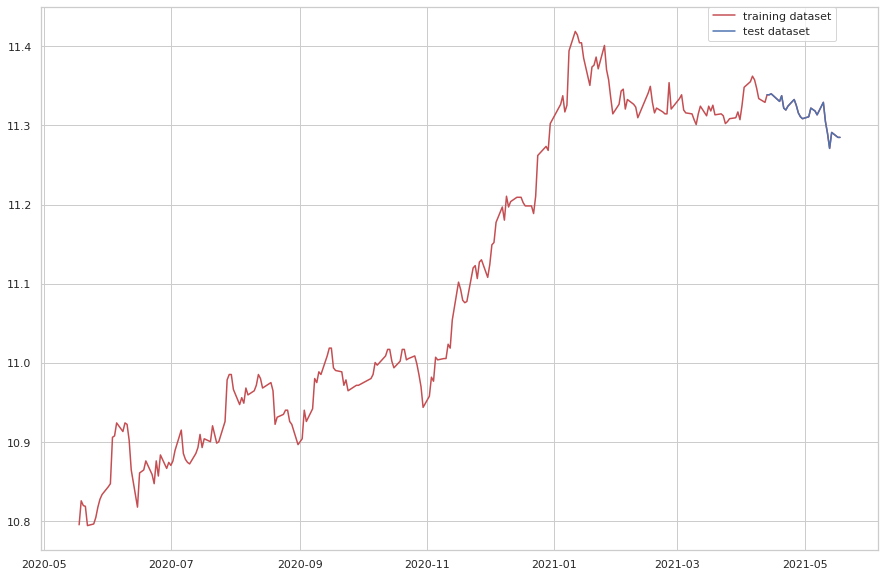

In [24]:
plt.plot(ts_log, c='r', label='training dataset')  
plt.plot(test_data, c='b', label='test dataset')
plt.legend(bbox_to_anchor= (0.95, 1), borderaxespad= 0.);

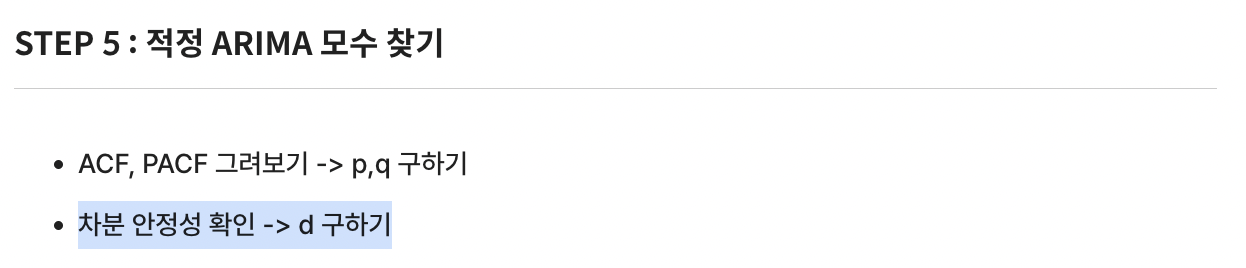

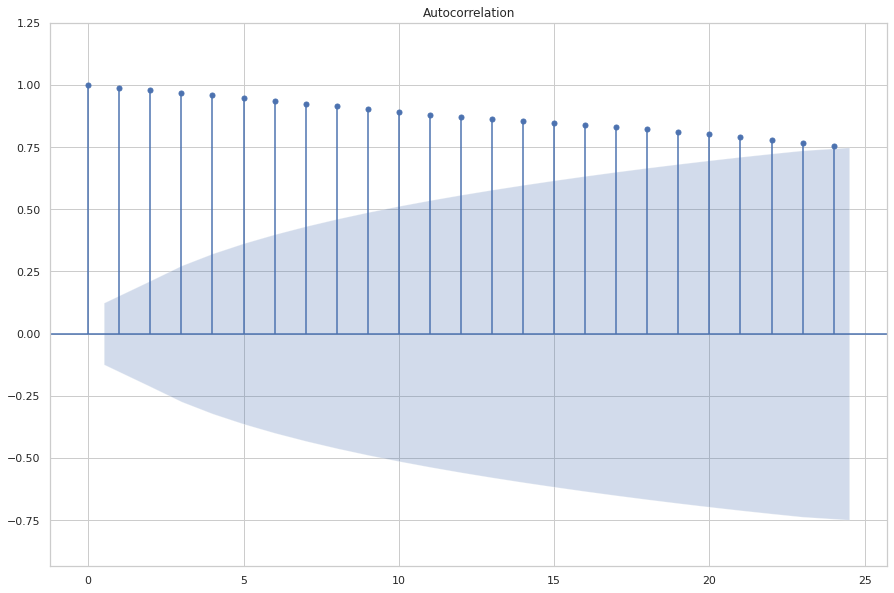

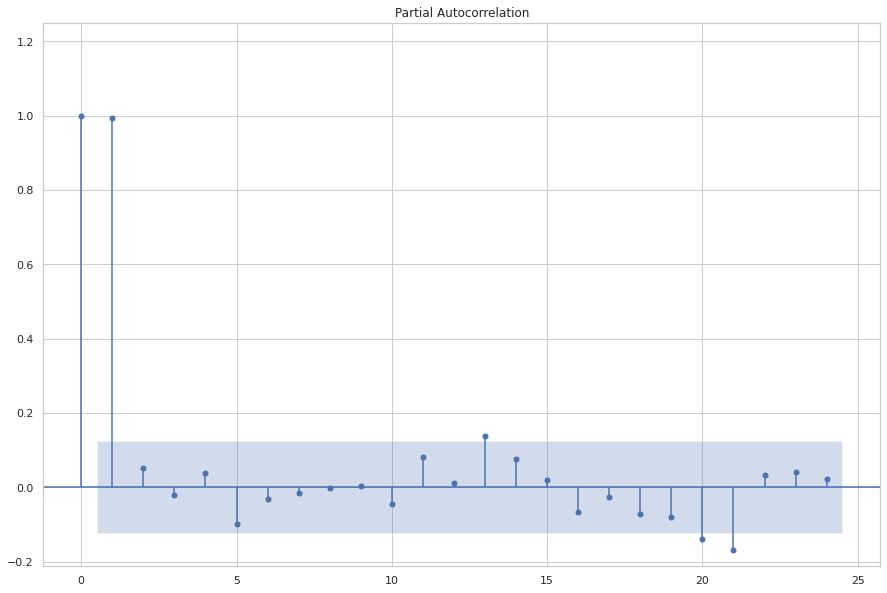

In [26]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log, auto_ylims= True)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log, auto_ylims= True)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

pacf -> lag 1, 13, 20, 21

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


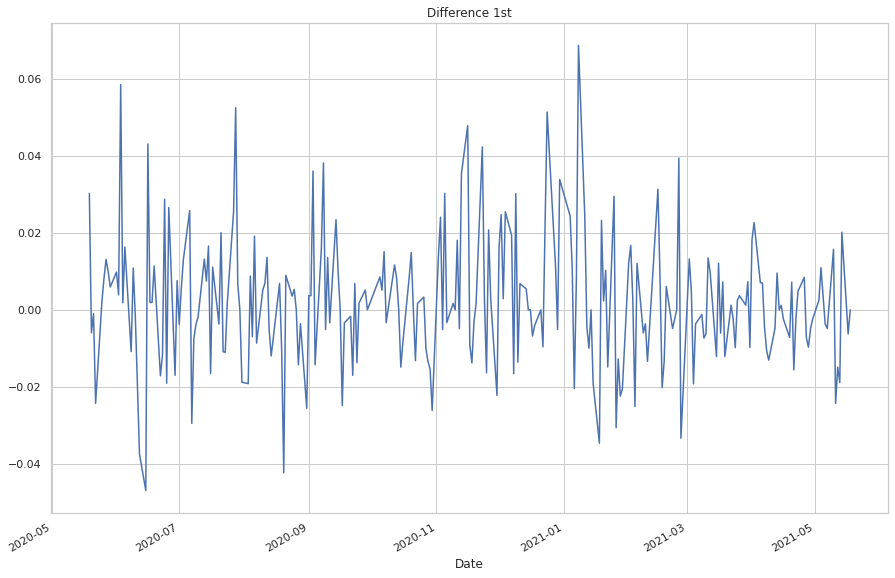

In [27]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


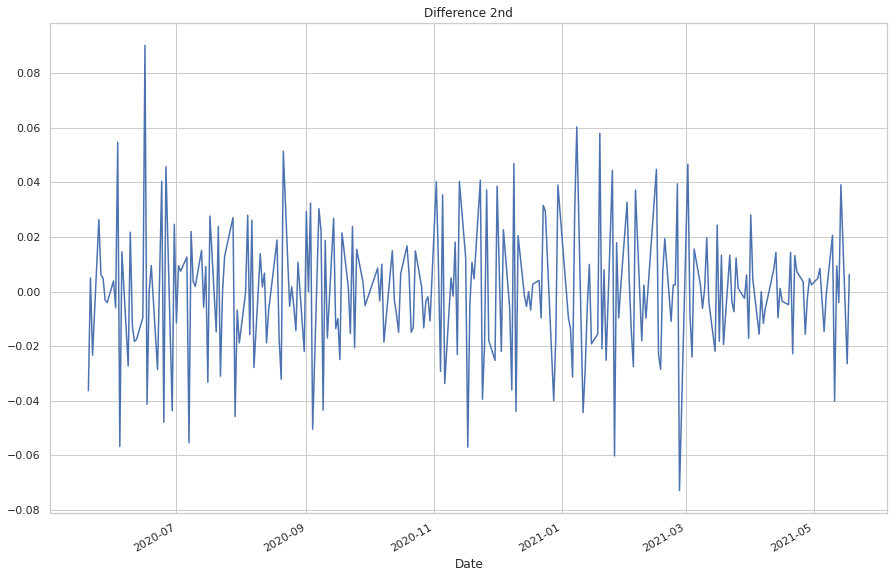

In [28]:
# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

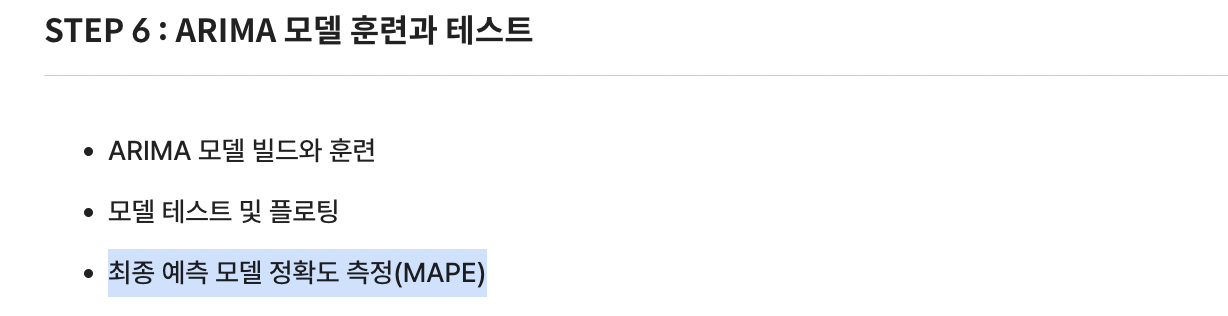

In [30]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

In [31]:
fitted_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 583.361
Date:                Thu, 05 Jan 2023   AIC                          -1156.722
Time:                        13:33:08   BIC                          -1139.642
Sample:                             0   HQIC                         -1149.828
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.129     86.277      0.000      10.838      11.342
ar.L1          0.7739      1.821      0.425      0.671      -2.796       4.344
ar.L2          0.2191      1.811      0.121      0.904      -3.331       3.769
ma.L1          0.2595      1.813      0.143      0.886      -3.294       3.813
sigma2         0.0003   2.56e-05     12.526      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                20.44
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.50
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
model2 = ARIMA(train_data, order=(13, 1, 0))  
fitted_m2 = model2.fit() 

In [33]:
fitted_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  225
Model:                ARIMA(13, 1, 0)   Log Likelihood                 587.273
Date:                Thu, 05 Jan 2023   AIC                          -1146.546
Time:                        13:33:48   BIC                          -1098.783
Sample:                             0   HQIC                         -1127.267
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0431      0.066      0.649      0.516      -0.087       0.173
ar.L2         -0.0162      0.080     -0.204      0.839      -0.172       0.140
ar.L3         -0.0405      0.075     -0.541      0.589      -0.187       0.106
ar.L4          0.0270      0.083      0.327      0.744      -0.135       0.189
ar.L5         -0.0016      0.073     -0.023      0.982      -0.144       0.141
ar.L6          0.0064      0.068      0.094      0.925      -0.127       0.140
ar.L7          0.0577      0.061      0.944      0.345      -0.062       0.178
ar.L8          0.0147      0.055      0.266      0.790      -0.094       0.123
ar.L9          0.0868      0.067      1.301      0.193      -0.044       0.218
ar.L10        -0.0957      0.075     -1.269      0.205      -0.244       0.052
ar.L11         0.0240      0.070      0.342      0.732      -0.113       0.161
ar.L12         0.0073      0.072      0.101      0.920      -0.135       0.149
ar.L13        -0.1130      0.079     -1.427      0.154      -0.268       0.042
sigma2         0.0003   2.69e-05     11.472      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                13.44
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.36
Prob(H) (two-sided):                  0.70   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
model3 = ARIMA(train_data, order=(20, 1, 0))  
fitted_m3 = model3.fit() 

In [35]:
fitted_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  225
Model:                ARIMA(20, 1, 0)   Log Likelihood                 588.924
Date:                Thu, 05 Jan 2023   AIC                          -1135.847
Time:                        13:34:45   BIC                          -1064.203
Sample:                             0   HQIC                         -1106.928
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0403      0.070      0.579      0.563      -0.096       0.177
ar.L2         -0.0181      0.082     -0.221      0.825      -0.178       0.142
ar.L3         -0.0419      0.083     -0.504      0.614      -0.205       0.121
ar.L4          0.0403      0.088      0.459      0.646      -0.132       0.212
ar.L5         -0.0050      0.075     -0.067      0.947      -0.151       0.141
ar.L6          0.0109      0.074      0.147      0.883      -0.134       0.156
ar.L7          0.0663      0.064      1.038      0.299      -0.059       0.191
ar.L8         -0.0018      0.067     -0.027      0.978      -0.134       0.130
ar.L9          0.0876      0.070      1.254      0.210      -0.049       0.224
ar.L10        -0.1009      0.078     -1.298      0.194      -0.253       0.051
ar.L11         0.0182      0.077      0.236      0.814      -0.133       0.169
ar.L12         0.0019      0.075      0.026      0.980      -0.146       0.150
ar.L13        -0.1201      0.082     -1.460      0.144      -0.281       0.041
ar.L14         0.0055      0.079      0.070      0.944      -0.150       0.161
ar.L15         0.0353      0.066      0.534      0.593      -0.094       0.165
ar.L16         0.0228      0.073      0.310      0.756      -0.121       0.167
ar.L17         0.1039      0.087      1.196      0.232      -0.066       0.274
ar.L18        -0.0207      0.087     -0.239      0.811      -0.191       0.149
ar.L19         0.0304      0.080      0.378      0.706      -0.127       0.188
ar.L20         0.0419      0.083      0.504      0.614      -0.121       0.205
sigma2         0.0003   2.64e-05     11.490      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                13.70
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.31
Prob(H) (two-sided):                  0.63   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
model4 = ARIMA(train_data, order=(21, 1, 0))  
fitted_m4 = model4.fit() 

In [37]:
fitted_m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  225
Model:                ARIMA(21, 1, 0)   Log Likelihood                 589.436
Date:                Thu, 05 Jan 2023   AIC                          -1134.873
Time:                        13:35:19   BIC                          -1059.817
Sample:                             0   HQIC                         -1104.576
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0378      0.070      0.536      0.592      -0.100       0.176
ar.L2         -0.0205      0.082     -0.249      0.803      -0.182       0.141
ar.L3         -0.0418      0.083     -0.507      0.612      -0.204       0.120
ar.L4          0.0317      0.089      0.357      0.721      -0.142       0.205
ar.L5         -0.0046      0.075     -0.061      0.951      -0.151       0.142
ar.L6          0.0107      0.075      0.142      0.887      -0.136       0.158
ar.L7          0.0666      0.064      1.035      0.301      -0.060       0.193
ar.L8          0.0080      0.067      0.121      0.904      -0.122       0.138
ar.L9          0.0861      0.069      1.242      0.214      -0.050       0.222
ar.L10        -0.1002      0.078     -1.283      0.199      -0.253       0.053
ar.L11         0.0241      0.077      0.314      0.753      -0.126       0.175
ar.L12        -0.0023      0.075     -0.031      0.975      -0.149       0.144
ar.L13        -0.1239      0.082     -1.514      0.130      -0.284       0.036
ar.L14        -0.0011      0.080     -0.013      0.989      -0.159       0.157
ar.L15         0.0319      0.068      0.471      0.638      -0.101       0.165
ar.L16         0.0239      0.073      0.327      0.744      -0.120       0.167
ar.L17         0.1004      0.088      1.147      0.251      -0.071       0.272
ar.L18        -0.0196      0.086     -0.228      0.820      -0.189       0.149
ar.L19         0.0330      0.081      0.409      0.682      -0.125       0.191
ar.L20         0.0417      0.084      0.497      0.619      -0.123       0.206
ar.L21         0.0714      0.083      0.857      0.391      -0.092       0.235
sigma2         0.0003   2.62e-05     11.522      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                14.31
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.32
Prob(H) (two-sided):                  0.62   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
import pmdarima as pm #auto ARIMA

In [40]:
aarima = pm.AutoARIMA(seasonal = True, 
             suppress_warnings = True, 
             trace = True, 
             max_D = 12)# 계절차분(D) = 12
res = aarima.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1159.385, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1166.730, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1164.792, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1164.794, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1164.726, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1162.816, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.926 seconds


In [41]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  225
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 585.365
Date:                Thu, 05 Jan 2023   AIC                          -1166.730
Time:                        13:40:42   BIC                          -1159.906
Sample:                             0   HQIC                         -1163.975
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0024      0.001      1.922      0.055   -4.66e-05       0.005
sigma2         0.0003   2.48e-05     12.694      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                22.25
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.52
Prob(H) (two-sided):                  0.87   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
model5 = ARIMA(train_data, order=(2, 1, 2))  
fitted_m5 = model5.fit() 

In [44]:
fitted_m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 583.607
Date:                Thu, 05 Jan 2023   AIC                          -1157.213
Time:                        13:41:30   BIC                          -1140.155
Sample:                             0   HQIC                         -1150.328
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5738      1.521     -0.377      0.706      -3.555       2.408
ar.L2         -0.5447      1.017     -0.536      0.592      -2.538       1.448
ma.L1          0.6113      1.503      0.407      0.684      -2.334       3.557
ma.L2          0.5674      0.997      0.569      0.569      -1.388       2.522
sigma2         0.0003   2.57e-05     12.435      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                20.78
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.52
Prob(H) (two-sided):                  0.86   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
model6 = ARIMA(train_data, order=(0, 1, 0))  
fitted_m6 = model6.fit() 

In [53]:
fitted_m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 583.363
Date:                Thu, 05 Jan 2023   AIC                          -1164.726
Time:                        13:46:15   BIC                          -1161.314
Sample:                             0   HQIC                         -1163.349
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   2.33e-05     13.751      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                22.25
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.52
Prob(H) (two-sided):                  0.89   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

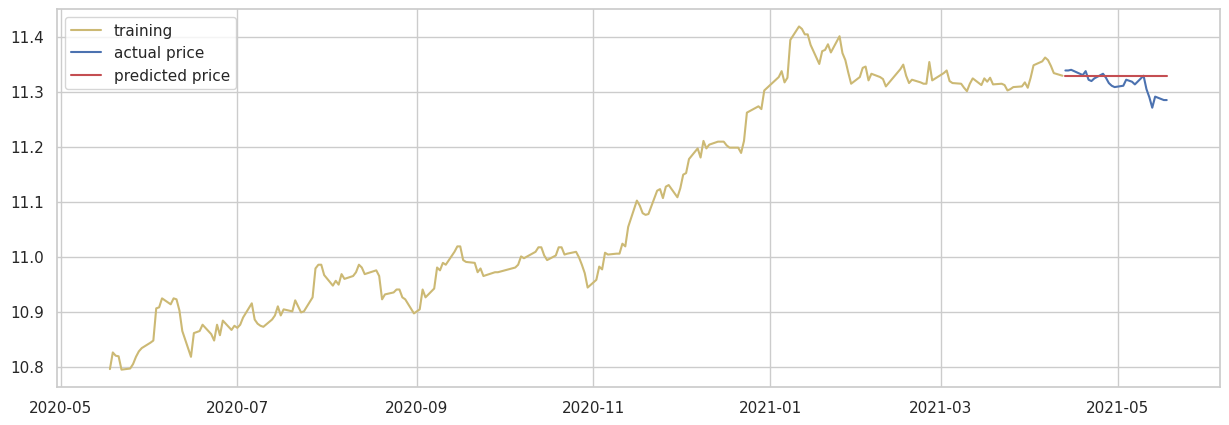

In [54]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m6.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train_data, c="y", label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

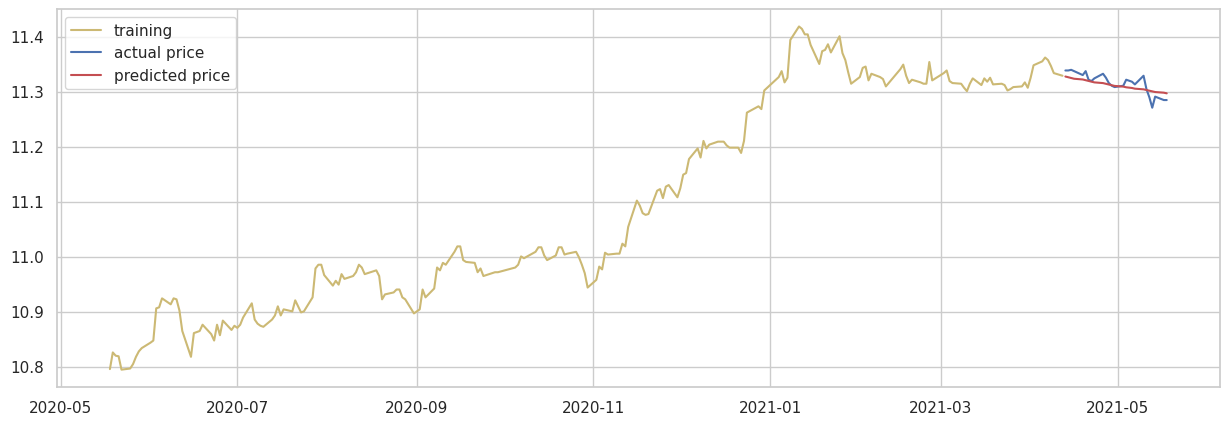

In [50]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train_data, c="y", label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data)) / np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape * 100))

MSE:  3509600.000000066
MAE:  1408.0000000000023
RMSE:  1873.3926443754567
MAPE: 1.74%


# NVIDIA Corporation (NVDA)

In [58]:
cd ~/aiffel/stock_prediction/data

/aiffel/aiffel/stock_prediction/data


In [59]:
ls

000660.KS.csv   323410.KS.csv            daily-min-temperatures.csv@
005930.KS.csv@  airline-passengers.csv@  NVDA.csv


In [60]:
nvda_path = os.getenv('HOME') + '/aiffel/stock_prediction/data/NVDA.csv'
nvda = pd.read_csv(nvda_path, index_col='Date', parse_dates=True)
nvda

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-04  302.769989  304.679993  283.489990  292.899994  292.626373   
2022-01-05  289.489990  294.160004  275.329987  276.040009  275.782104   
2022-01-06  276.399994  284.380005  270.649994  281.779999  281.516754   
2022-01-07  281.410004  284.220001  270.570007  272.470001  272.215454   
2022-01-10  265.809998  274.690002  256.440002  274.000000  273.744019   
...                ...         ...         ...         ...         ...   
2022-12-28  139.270004  142.619995  138.839996  140.360001  140.360001   
2022-12-29  144.020004  146.830002  142.270004  146.029999  146.029999   
2022-12-30  143.339996  146.289993  142.330002  146.139999  146.139999   
2023-01-03  148.509995  149.960007  140.960007  143.149994  143.149994   
2023-01-04  145.669998  148.529999  142.410004  147.490005  147.490005   

              Volume  
Date                  
2022-01-04  52715400  
2022-01-05  49806400  
2022-01-06  45418600  
2022-01-07  40993900  
2022-01-10  59468100  
...              ...  
2022-12-28  35106600  
2022-12-29  35492300  
2022-12-30  31027300  
2023-01-03  40127700  
2023-01-04  43086500  

[252 rows x 6 columns]

In [63]:
nvda_ts = nvda["Close"]
nvda_ts

Date
2022-01-04    292.899994
2022-01-05    276.040009
2022-01-06    281.779999
2022-01-07    272.470001
2022-01-10    274.000000
                 ...    
2022-12-28    140.360001
2022-12-29    146.029999
2022-12-30    146.139999
2023-01-03    143.149994
2023-01-04    147.490005
Name: Close, Length: 252, dtype: float64

In [68]:
nvda_ts.isnull().sum()

0

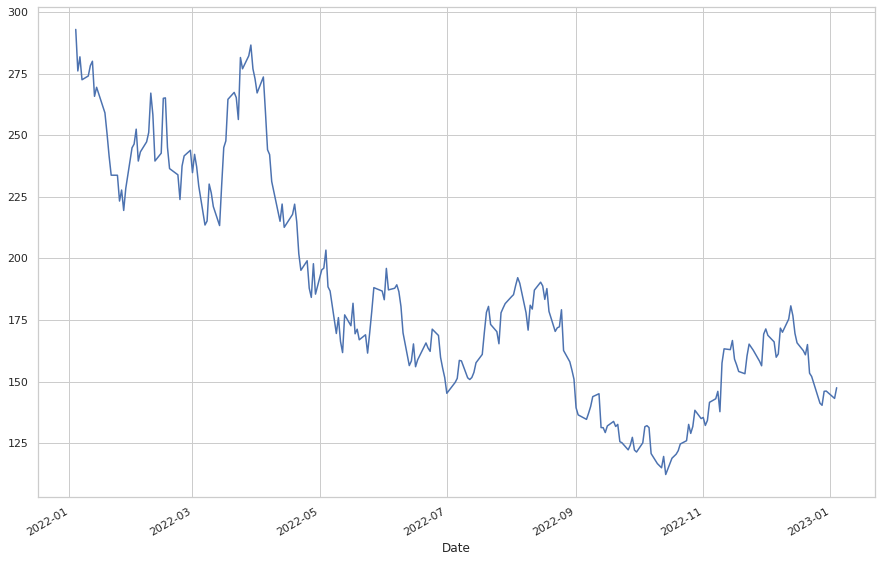

In [70]:
nvda_ts.plot();

In [73]:
nvda_log = np.log(nvda_ts)
nvda_log

Date
2022-01-04    5.679831
2022-01-05    5.620546
2022-01-06    5.641127
2022-01-07    5.607529
2022-01-10    5.613128
                ...   
2022-12-28    4.944211
2022-12-29    4.983812
2022-12-30    4.984565
2023-01-03    4.963893
2023-01-04    4.993760
Name: Close, Length: 252, dtype: float64

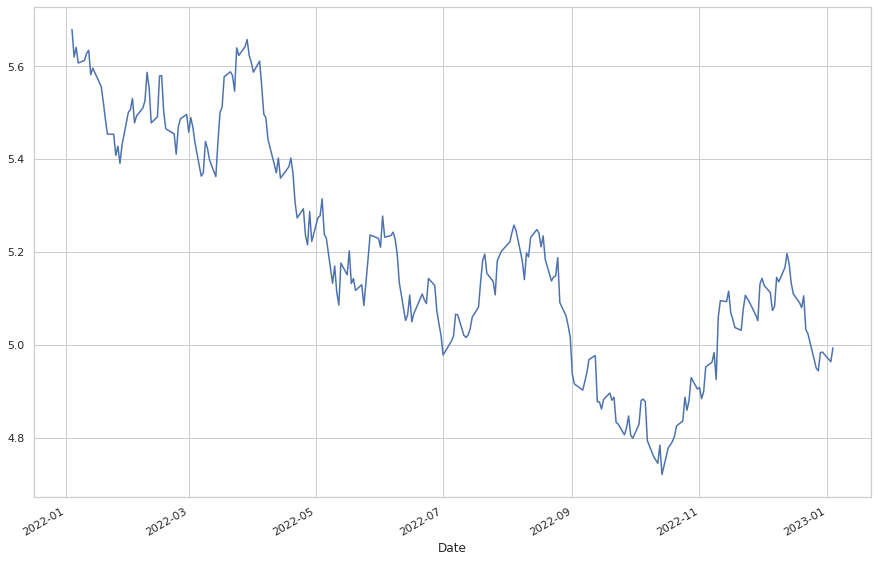

In [79]:
nvda_log.plot();

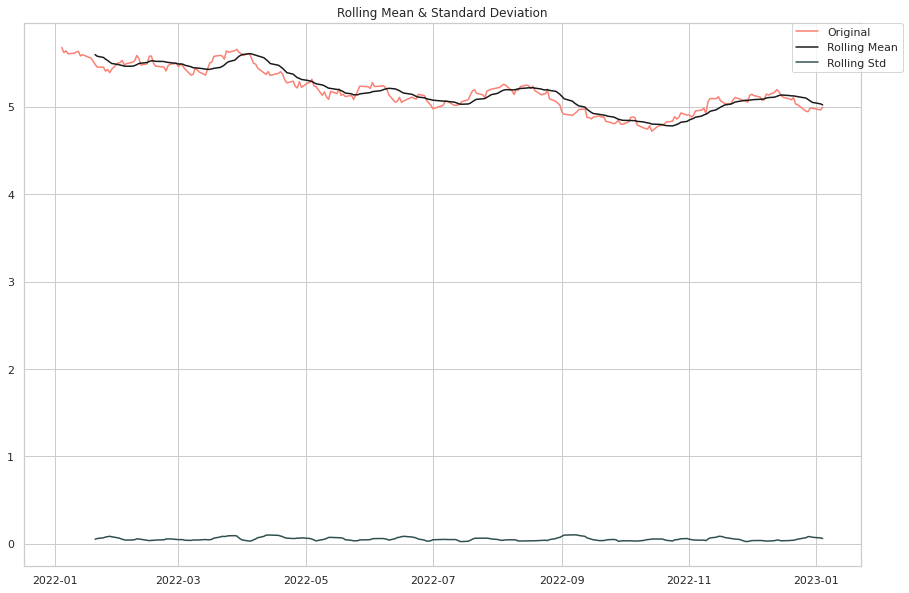

Results of Dickey-Fuller Test:
Test Statistic                  -1.970588
p-value                          0.299616
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


In [93]:
# 정성적 그래프 분석
plot_rolling_statistics(nvda_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(nvda_log)

#시계열 분해 (Time Series Decomposition)
decomposition = seasonal_decompose(nvda_log, model='multiplicative', period = 30) 

In [94]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

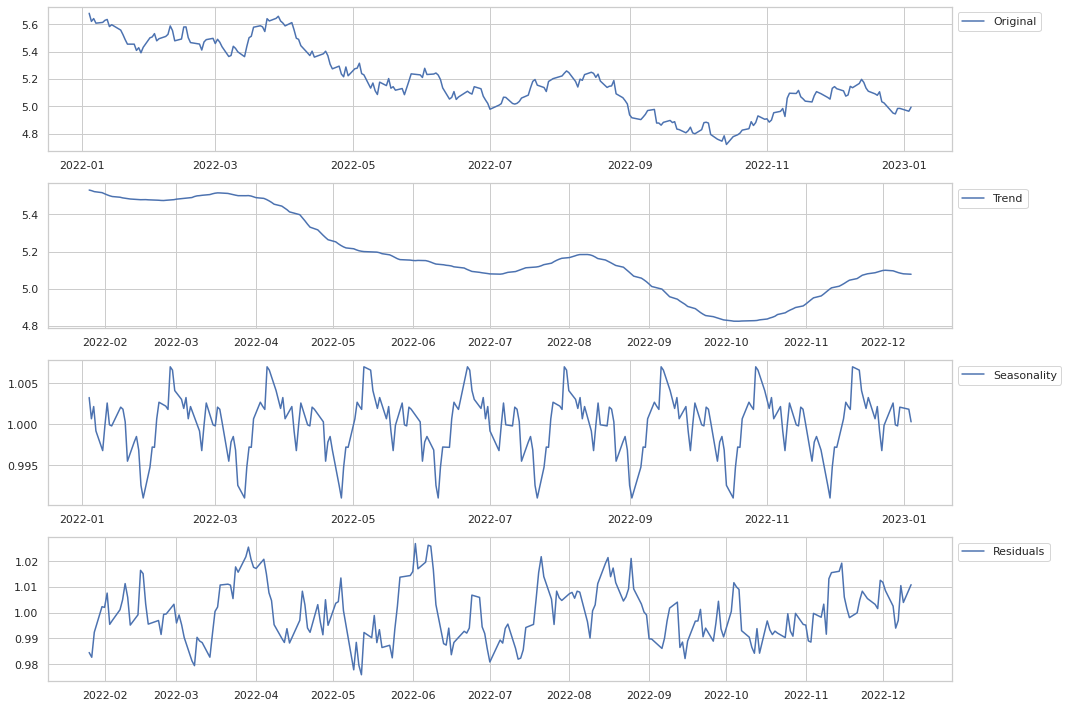

In [95]:
plt.subplot(411)
plt.plot(nvda_log, label='Original')
plt.legend(bbox_to_anchor=(1,1), loc= 2)

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(bbox_to_anchor=(1,1), loc= 2)

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(bbox_to_anchor=(1,1), loc= 2)

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(bbox_to_anchor=(1,1), loc= 2)

plt.tight_layout()

In [97]:
residual.isnull().sum()

30

In [98]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.289080
p-value                          0.000006
#Lags Used                       0.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64


In [99]:
train_nvda, test_nvda = nvda_log[:int(len(nvda_log) * 0.9)], nvda_log[int(len(nvda_log) * 0.9):]

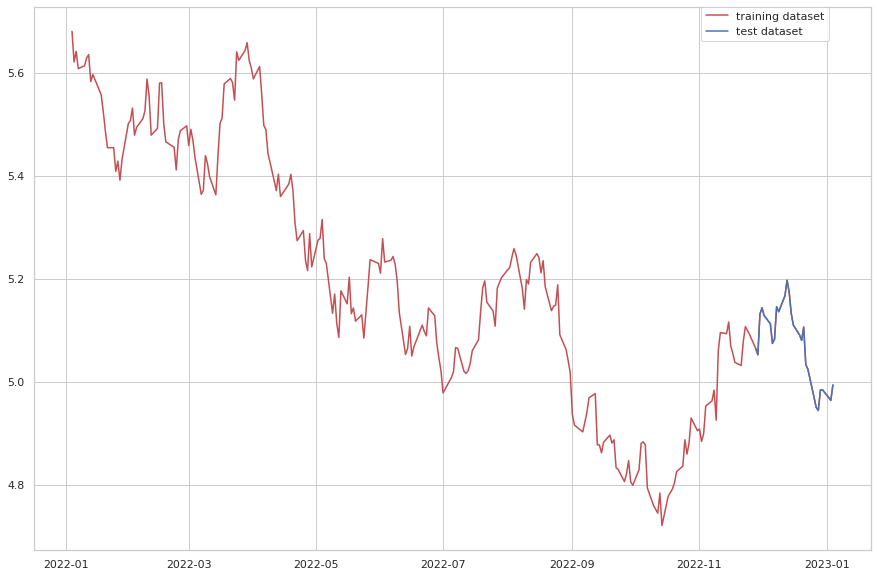

In [100]:
plt.plot(nvda_log, c='r', label='training dataset')  
plt.plot(test_nvda, c='b', label='test dataset')
plt.legend(bbox_to_anchor= (0.95, 1), borderaxespad= 0.);

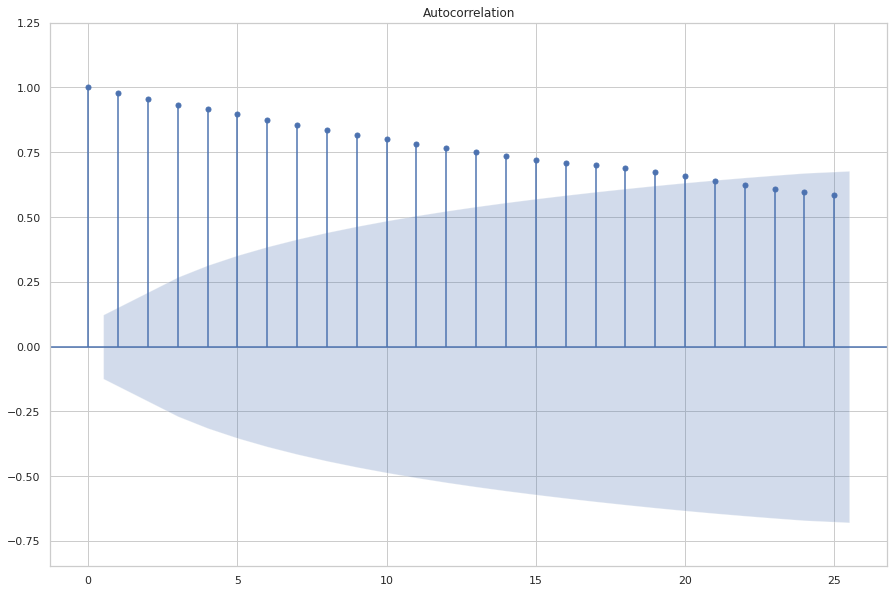

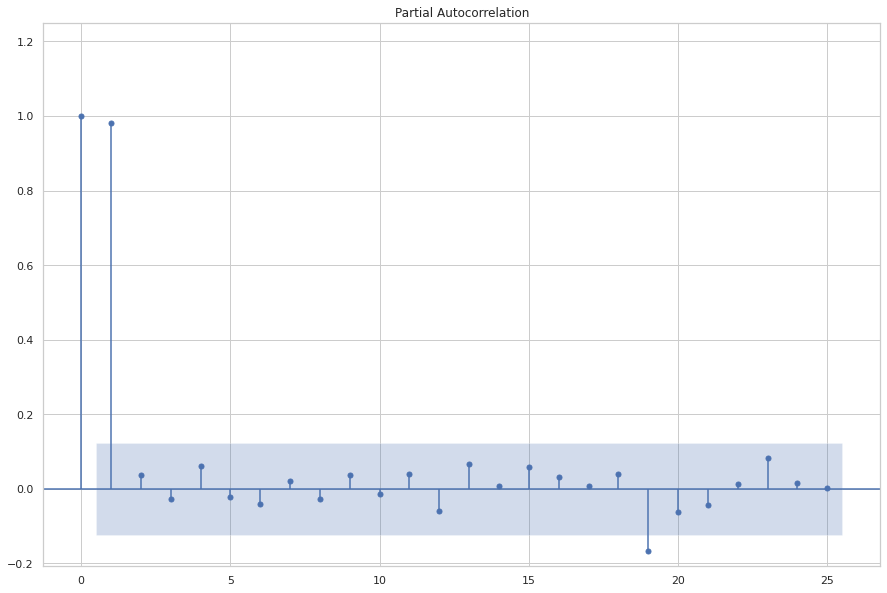

In [102]:
plot_acf(nvda_log, auto_ylims=True)
plot_pacf(nvda_log, auto_ylims=True)
plt.show()

lag 1, 19

Results of Dickey-Fuller Test:
Test Statistic                -1.605341e+01
p-value                        5.741745e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -9.392315e+00
p-value                        6.511248e-16
#Lags Used                     9.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


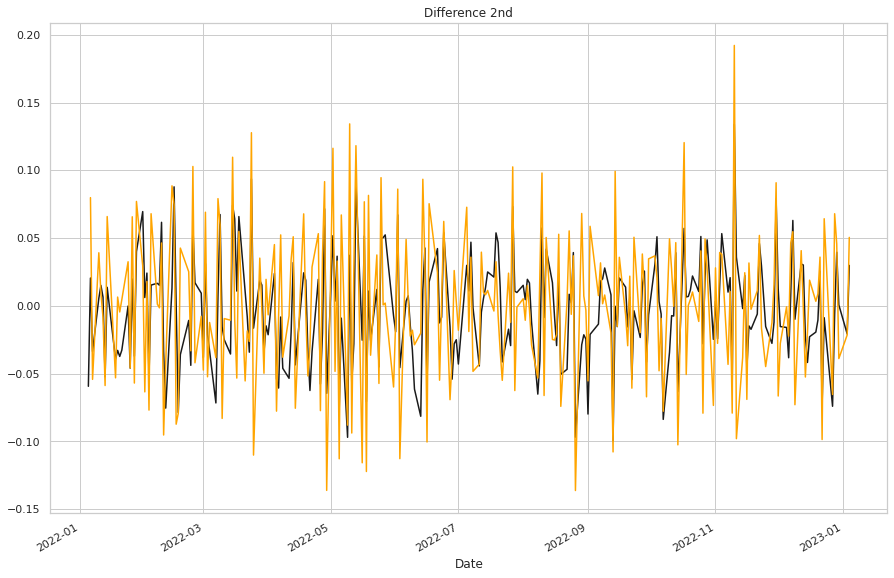

In [107]:
# 1차 차분 구하기
diff_1 = nvda_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st', c= "k")

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd', c= "orange")

augmented_dickey_fuller_test(diff_2)

In [108]:
aarima = pm.AutoARIMA(seasonal = True, 
             suppress_warnings = True, 
             trace = True, 
             max_D = 12)# 계절차분(D) = 12
res = aarima.fit(train_nvda)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-796.360, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-803.985, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-802.104, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-802.101, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-805.036, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-800.102, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.131 seconds


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-796.360

In [112]:
model = ARIMA(train_nvda, order=(19, 2, 0))  
fitted_m = model.fit() 

In [113]:
fitted_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  226
Model:                ARIMA(19, 2, 0)   Log Likelihood                 404.525
Date:                Thu, 05 Jan 2023   AIC                           -769.050
Time:                        14:38:12   BIC                           -700.817
Sample:                             0   HQIC                          -741.508
                                - 226                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9376      0.072    -13.026      0.000      -1.079      -0.797
ar.L2         -0.9006      0.100     -9.039      0.000      -1.096      -0.705
ar.L3         -0.8858      0.109     -8.158      0.000      -1.099      -0.673
ar.L4         -0.8308      0.122     -6.810      0.000      -1.070      -0.592
ar.L5         -0.7737      0.140     -5.539      0.000      -1.048      -0.500
ar.L6         -0.7477      0.153     -4.873      0.000      -1.048      -0.447
ar.L7         -0.6112      0.162     -3.777      0.000      -0.928      -0.294
ar.L8         -0.6055      0.159     -3.804      0.000      -0.917      -0.294
ar.L9         -0.5376      0.175     -3.070      0.002      -0.881      -0.194
ar.L10        -0.4775      0.178     -2.688      0.007      -0.826      -0.129
ar.L11        -0.2893      0.168     -1.717      0.086      -0.620       0.041
ar.L12        -0.3277      0.174     -1.880      0.060      -0.669       0.014
ar.L13        -0.2945      0.178     -1.656      0.098      -0.643       0.054
ar.L14        -0.2968      0.156     -1.900      0.057      -0.603       0.009
ar.L15        -0.3154      0.161     -1.960      0.050      -0.631   -6.55e-05
ar.L16        -0.2150      0.140     -1.540      0.124      -0.489       0.059
ar.L17        -0.2727      0.126     -2.158      0.031      -0.520      -0.025
ar.L18        -0.1504      0.101     -1.487      0.137      -0.349       0.048
ar.L19        -0.0734      0.070     -1.042      0.298      -0.211       0.065
sigma2         0.0016      0.000      9.853      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.93   Prob(JB):                         0.78
Heteroskedasticity (H):               0.84   Skew:                             0.11
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [114]:
model2 = ARIMA(train_nvda, order=(1, 2, 0))  
fitted_m2 = model2.fit() 

In [115]:
fitted_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  226
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 356.779
Date:                Thu, 05 Jan 2023   AIC                           -709.558
Time:                        14:38:25   BIC                           -702.735
Sample:                             0   HQIC                          -706.804
                                - 226                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5159      0.059     -8.767      0.000      -0.631      -0.401
sigma2         0.0024      0.000     10.658      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   5.05   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.02   Prob(JB):                         0.51
Heteroskedasticity (H):               0.81   Skew:                             0.19
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
model3 = ARIMA(train_nvda, order=(1, 1, 0))  
fitted_m3 = model3.fit() 

In [117]:
fitted_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  226
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 403.559
Date:                Thu, 05 Jan 2023   AIC                           -803.118
Time:                        14:39:22   BIC                           -796.286
Sample:                             0   HQIC                          -800.361
                                - 226                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0191      0.074     -0.259      0.796      -0.164       0.126
sigma2         0.0016      0.000     10.110      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.96   Prob(JB):                         0.80
Heteroskedasticity (H):               0.87   Skew:                             0.11
Prob(H) (two-sided):                  0.53   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

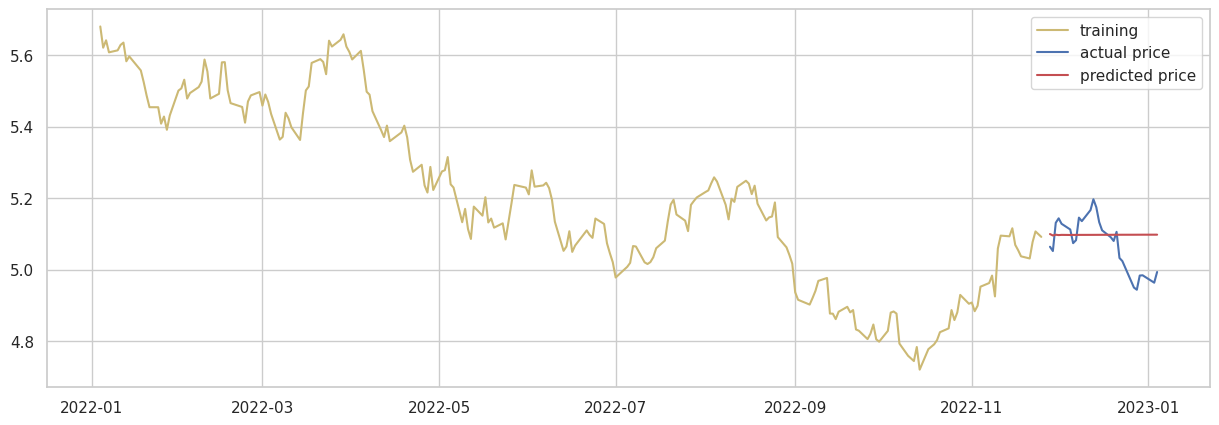

In [118]:
fc = fitted_m2.forecast(len(test_nvda), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index= test_nvda.index)   # 예측결과

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train_nvda, c="y", label='training')
plt.plot(test_nvda, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [119]:
mse = mean_squared_error(np.exp(test_nvda), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_nvda), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_nvda), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_nvda)) / np.abs(np.exp(test_nvda)))
print('MAPE: {:.2f}%'.format(mape * 100))

MSE:  137.599451048203
MAE:  9.58255614745568
RMSE:  11.73027923999267
MAPE: 6.18%


# SK hynix Inc. (000660.KS)

In [61]:
hynix_path = os.getenv('HOME') + '/aiffel/stock_prediction/data/000660.KS.csv'
hynix = pd.read_csv(hynix_path, index_col='Date', parse_dates=True)
hynix

Open      High       Low     Close      Adj Close   Volume
Date                                                                      
2022-01-05  129000.0  129000.0  121500.0  125500.0  124331.109375  7414954
2022-01-06  123500.0  127000.0  123000.0  125000.0  123835.765625  3725569
2022-01-07  127000.0  129000.0  126500.0  127000.0  125817.140625  3270119
2022-01-10  126500.0  127000.0  123000.0  124500.0  123340.421875  3449197
2022-01-11  125500.0  128500.0  124500.0  128000.0  126807.828125  3958787
...              ...       ...       ...       ...            ...      ...
2022-12-29   75200.0   75600.0   74700.0   75000.0   75000.000000  1736661
2023-01-02   75100.0   76700.0   75000.0   75700.0   75700.000000  1376985
2023-01-03   75600.0   76300.0   73100.0   75600.0   75600.000000  2719437
2023-01-04   75400.0   81900.0   75200.0   81000.0   81000.000000  5154609
2023-01-05   83300.0   83300.0   80800.0   81400.0   81400.000000  3375039

[247 rows x 6 columns]

In [64]:
hynix_ts = hynix["Close"]
hynix_ts

Date
2022-01-05    125500.0
2022-01-06    125000.0
2022-01-07    127000.0
2022-01-10    124500.0
2022-01-11    128000.0
                ...   
2022-12-29     75000.0
2023-01-02     75700.0
2023-01-03     75600.0
2023-01-04     81000.0
2023-01-05     81400.0
Name: Close, Length: 247, dtype: float64

In [66]:
hynix_ts.isnull().sum()

0

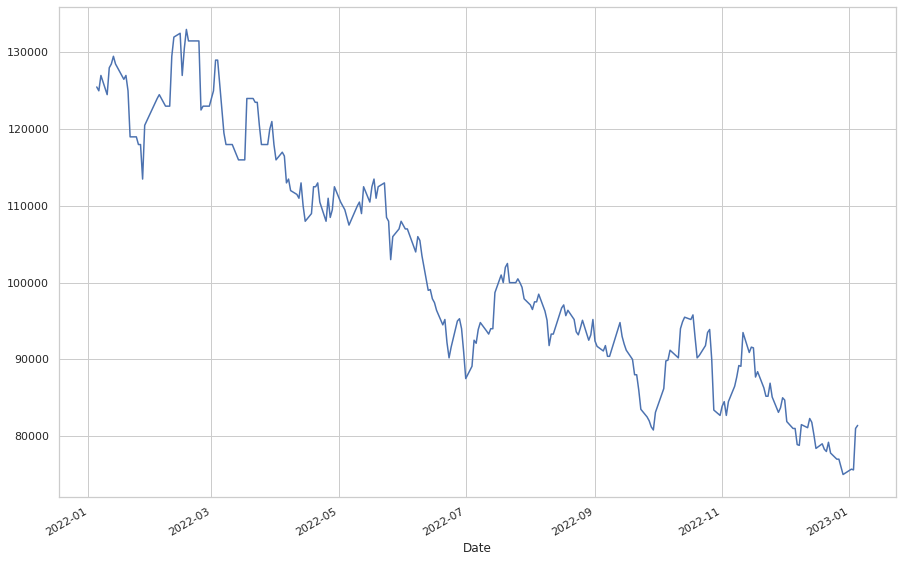

In [71]:
hynix_ts.plot();

In [75]:
hynix_log = np.log(hynix_ts)
hynix_log

Date
2022-01-05    11.740061
2022-01-06    11.736069
2022-01-07    11.751942
2022-01-10    11.732061
2022-01-11    11.759786
                ...    
2022-12-29    11.225243
2023-01-02    11.234533
2023-01-03    11.233212
2023-01-04    11.302204
2023-01-05    11.307131
Name: Close, Length: 247, dtype: float64

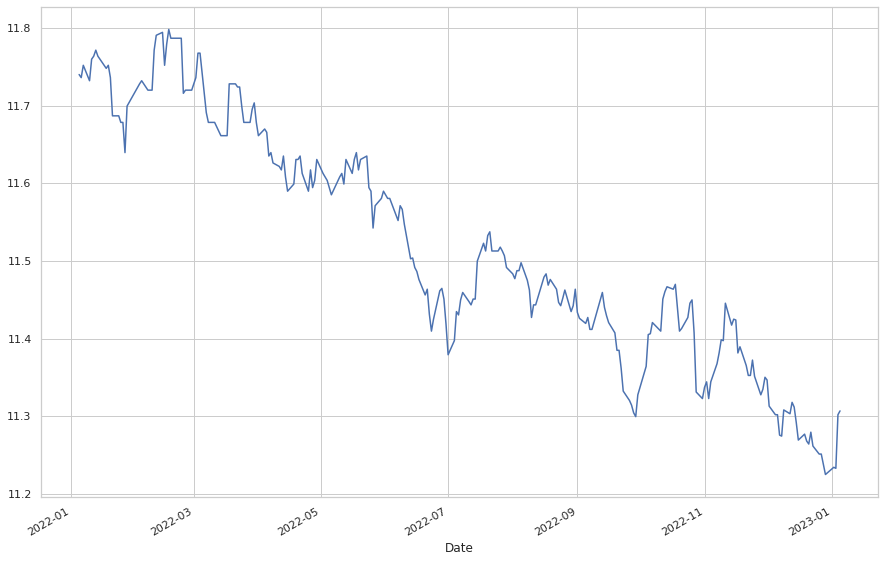

In [78]:
hynix_log.plot();

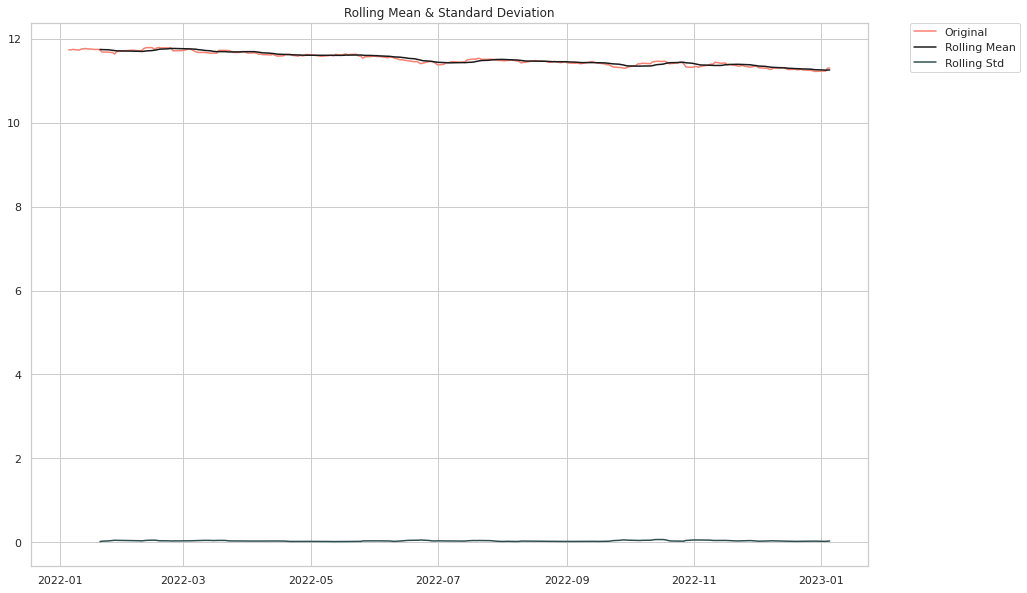

Results of Dickey-Fuller Test:
Test Statistic                  -1.181863
p-value                          0.681349
#Lags Used                       0.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


In [120]:
# 정성적 그래프 분석
plot_rolling_statistics(hynix_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(hynix_log)

#시계열 분해 (Time Series Decomposition)
decomposition = seasonal_decompose(hynix_log, model='multiplicative', period = 30) 

In [121]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

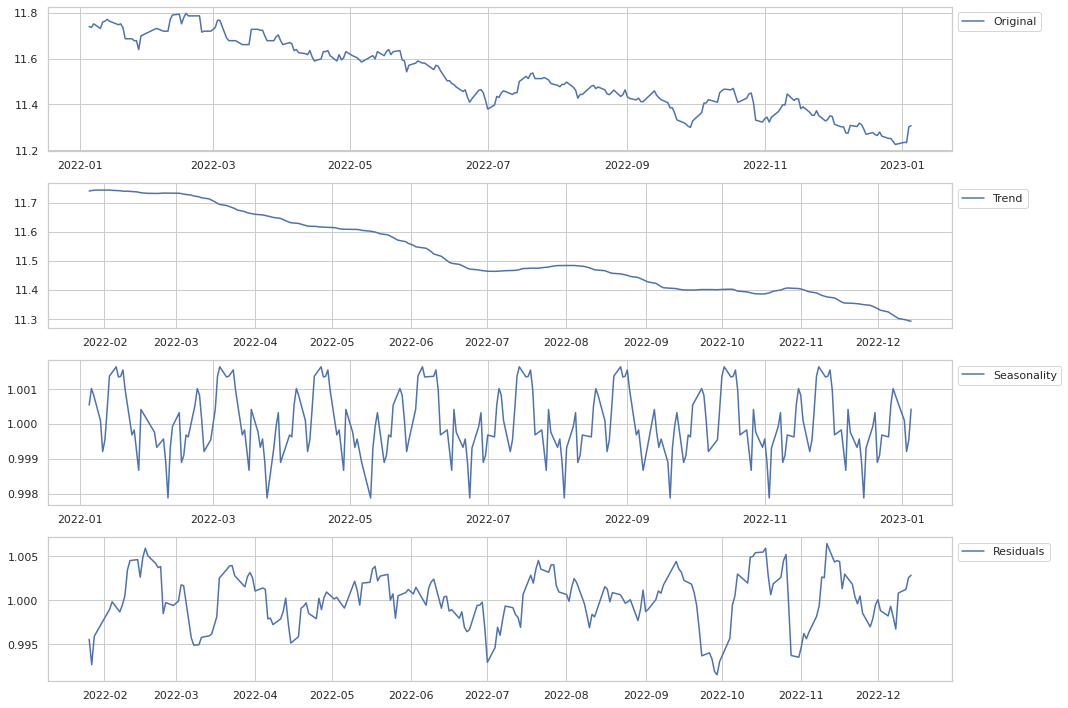

In [122]:
plt.subplot(411)
plt.plot(hynix_log, label='Original')
plt.legend(bbox_to_anchor=(1,1), loc= 2)

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(bbox_to_anchor=(1,1), loc= 2)

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(bbox_to_anchor=(1,1), loc= 2)

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(bbox_to_anchor=(1,1), loc= 2)

plt.tight_layout()

In [123]:
train_hynix, test_hynix = hynix_log[:int(len(hynix_log)*0.9)], hynix_log[int(len(hynix_log)*0.9):]

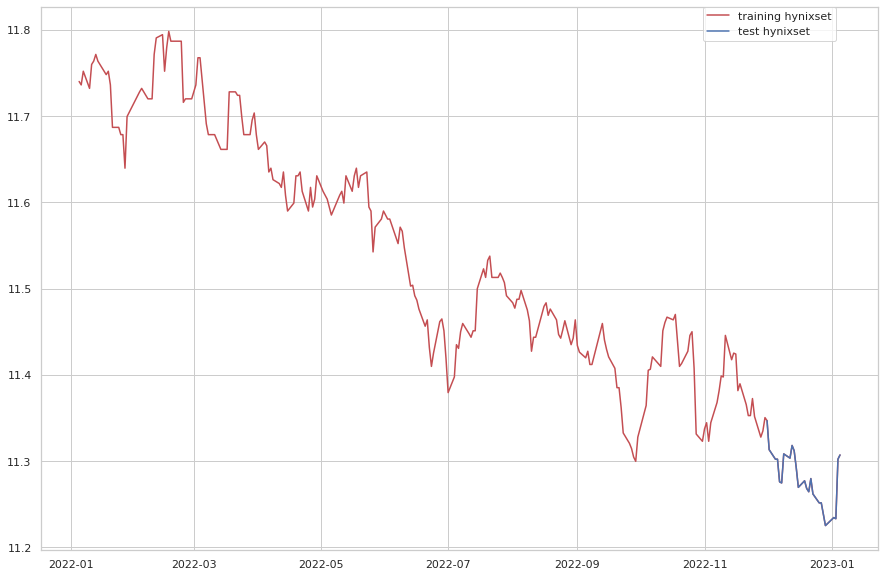

In [124]:
plt.plot(hynix_log, c='r', label='training hynixset')  
plt.plot(test_hynix, c='b', label='test hynixset')
plt.legend(bbox_to_anchor= (0.95, 1), borderaxespad= 0.);

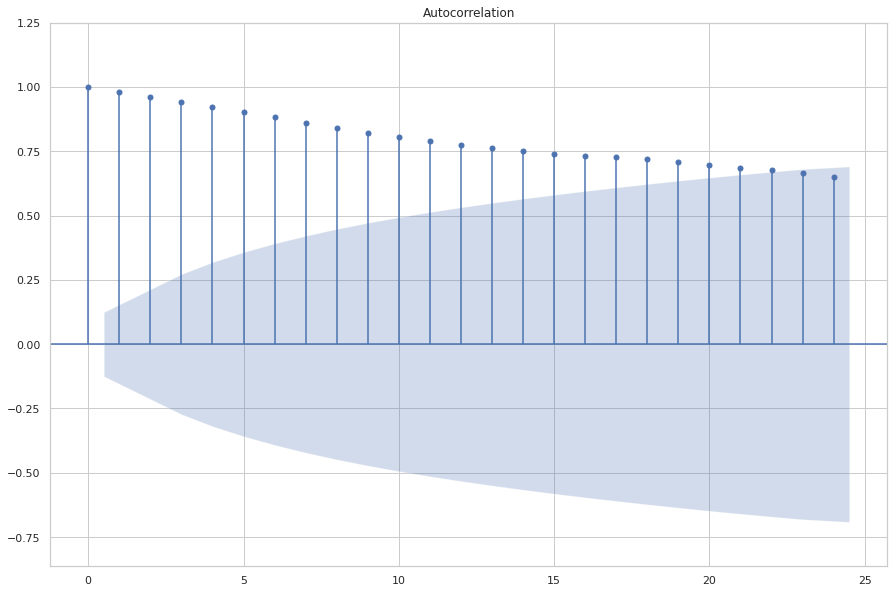

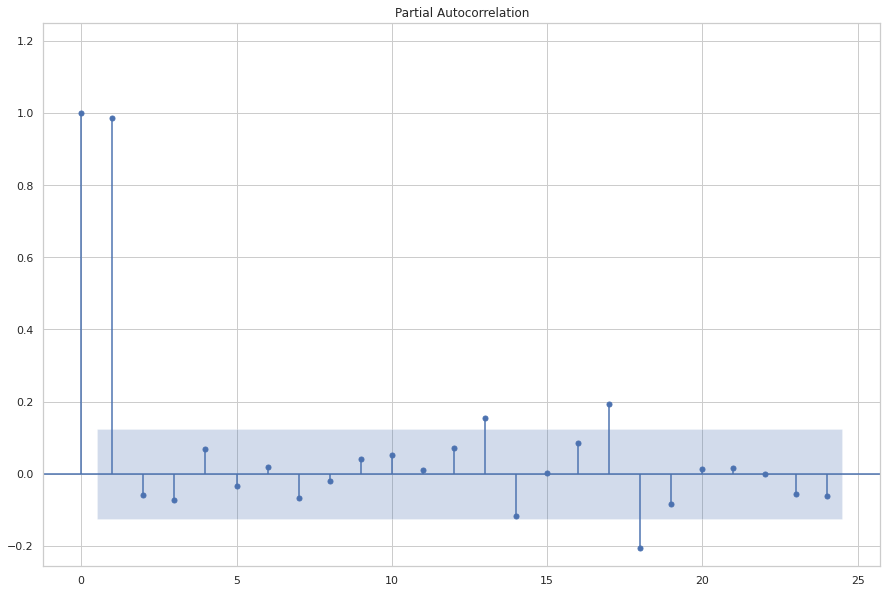

In [125]:
plot_acf(hynix_log, auto_ylims=True)
plot_pacf(hynix_log, auto_ylims=True)
plt.show()

lag 1, 13, 17, 18

Results of Dickey-Fuller Test:
Test Statistic                -1.143054e+01
p-value                        6.533381e-21
#Lags Used                     1.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.432609e+00
p-value                        1.682851e-08
#Lags Used                     1.500000e+01
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64


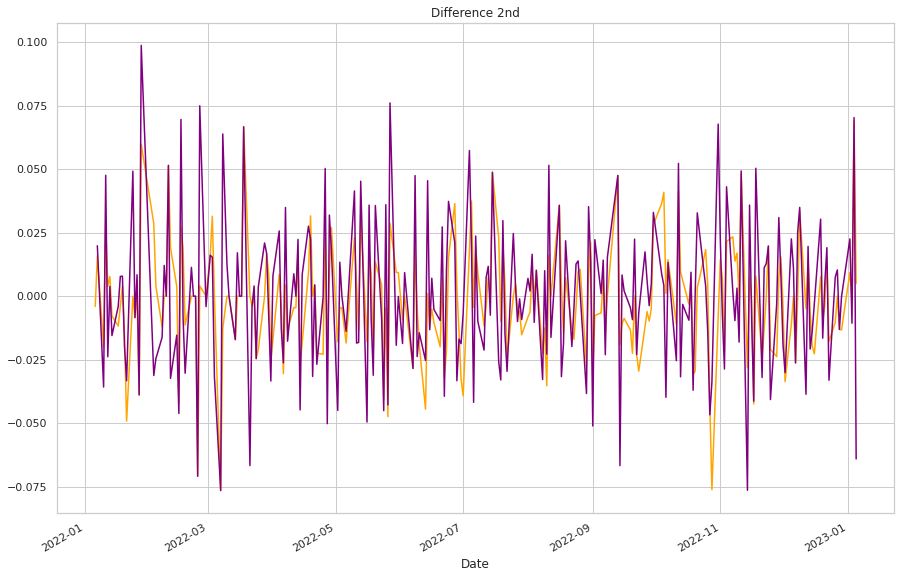

In [127]:
# 1차 차분 구하기
diff_1 = hynix_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st', c= "orange")

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd', c= "purple")

augmented_dickey_fuller_test(diff_2)

In [128]:
res = aarima.fit(train_hynix)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1053.067, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1057.481, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1056.248, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1056.383, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1058.055, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1054.716, Time=0.52 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.623 seconds


ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1053.067

In [129]:
model = ARIMA(train_hynix, order=(1, 0, 0))  
fitted_m = model.fit()

In [130]:
fitted_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  222
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 530.792
Date:                Thu, 05 Jan 2023   AIC                          -1055.584
Time:                        14:51:23   BIC                          -1045.376
Sample:                             0   HQIC                         -1051.463
                                - 222                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5428      0.077    150.492      0.000      11.392      11.693
ar.L1          0.9868      0.010     98.364      0.000       0.967       1.006
sigma2         0.0005   3.64e-05     13.254      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.95   Jarque-Bera (JB):                13.04
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.12
Prob(H) (two-sided):                  0.56   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [131]:
model2 = ARIMA(train_hynix, order=(13, 1, 0))  
fitted_m2 = model2.fit()

In [132]:
fitted_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  222
Model:                ARIMA(13, 1, 0)   Log Likelihood                 538.484
Date:                Thu, 05 Jan 2023   AIC                          -1048.968
Time:                        14:52:41   BIC                          -1001.394
Sample:                             0   HQIC                         -1029.758
                                - 222                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0487      0.074      0.655      0.513      -0.097       0.194
ar.L2         -0.0735      0.086     -0.856      0.392      -0.242       0.095
ar.L3         -0.0583      0.091     -0.639      0.523      -0.237       0.121
ar.L4         -0.0155      0.065     -0.238      0.812      -0.144       0.113
ar.L5         -0.0336      0.077     -0.436      0.663      -0.185       0.117
ar.L6          0.0938      0.066      1.412      0.158      -0.036       0.224
ar.L7         -0.0241      0.075     -0.323      0.746      -0.170       0.122
ar.L8         -0.0361      0.068     -0.532      0.594      -0.169       0.097
ar.L9         -0.0828      0.080     -1.029      0.304      -0.241       0.075
ar.L10        -0.0638      0.063     -1.012      0.312      -0.187       0.060
ar.L11        -0.0909      0.070     -1.308      0.191      -0.227       0.045
ar.L12        -0.1400      0.074     -1.881      0.060      -0.286       0.006
ar.L13         0.1069      0.081      1.321      0.187      -0.052       0.265
sigma2         0.0004   4.13e-05     10.813      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.30
Prob(Q):                              0.88   Prob(JB):                         0.12
Heteroskedasticity (H):               0.89   Skew:                            -0.02
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [133]:
model3 = ARIMA(train_hynix, order=(18, 1, 0))  
fitted_m3 = model3.fit()

In [135]:
fitted_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  222
Model:                ARIMA(18, 1, 0)   Log Likelihood                 543.974
Date:                Thu, 05 Jan 2023   AIC                          -1049.948
Time:                        14:53:20   BIC                           -985.383
Sample:                             0   HQIC                         -1023.878
                                - 222                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0532      0.076      0.698      0.485      -0.096       0.203
ar.L2         -0.0587      0.086     -0.683      0.495      -0.227       0.110
ar.L3         -0.0490      0.090     -0.546      0.585      -0.225       0.127
ar.L4         -0.0558      0.071     -0.790      0.430      -0.194       0.083
ar.L5         -0.0440      0.078     -0.566      0.572      -0.197       0.109
ar.L6          0.0894      0.069      1.296      0.195      -0.046       0.225
ar.L7         -0.0408      0.078     -0.526      0.599      -0.193       0.111
ar.L8         -0.0311      0.074     -0.421      0.674      -0.176       0.114
ar.L9         -0.0814      0.076     -1.067      0.286      -0.231       0.068
ar.L10        -0.0403      0.065     -0.618      0.536      -0.168       0.087
ar.L11        -0.1145      0.073     -1.563      0.118      -0.258       0.029
ar.L12        -0.1502      0.078     -1.933      0.053      -0.302       0.002
ar.L13         0.0941      0.081      1.159      0.246      -0.065       0.253
ar.L14        -0.0185      0.064     -0.291      0.771      -0.143       0.106
ar.L15        -0.0399      0.081     -0.492      0.623      -0.199       0.119
ar.L16        -0.2047      0.075     -2.725      0.006      -0.352      -0.057
ar.L17         0.0964      0.081      1.186      0.236      -0.063       0.256
ar.L18         0.0116      0.084      0.138      0.890      -0.153       0.176
sigma2         0.0004   4.28e-05      9.878      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.69
Prob(Q):                              0.81   Prob(JB):                         0.43
Heteroskedasticity (H):               0.95   Skew:                             0.08
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [136]:
model4 = ARIMA(train_hynix, order=(17, 1, 0))  
fitted_m4 = model4.fit()

In [137]:
fitted_m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  222
Model:                ARIMA(17, 1, 0)   Log Likelihood                 543.961
Date:                Thu, 05 Jan 2023   AIC                          -1051.922
Time:                        14:54:02   BIC                           -990.755
Sample:                             0   HQIC                         -1027.223
                                - 222                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0541      0.076      0.711      0.477      -0.095       0.203
ar.L2         -0.0610      0.085     -0.719      0.472      -0.227       0.105
ar.L3         -0.0492      0.090     -0.549      0.583      -0.225       0.126
ar.L4         -0.0561      0.070     -0.804      0.421      -0.193       0.081
ar.L5         -0.0433      0.077     -0.561      0.575      -0.195       0.108
ar.L6          0.0881      0.067      1.311      0.190      -0.044       0.220
ar.L7         -0.0430      0.077     -0.555      0.579      -0.195       0.109
ar.L8         -0.0312      0.072     -0.430      0.667      -0.173       0.111
ar.L9         -0.0820      0.076     -1.076      0.282      -0.231       0.067
ar.L10        -0.0406      0.065     -0.625      0.532      -0.168       0.087
ar.L11        -0.1144      0.073     -1.560      0.119      -0.258       0.029
ar.L12        -0.1484      0.070     -2.119      0.034      -0.286      -0.011
ar.L13         0.0938      0.081      1.160      0.246      -0.065       0.252
ar.L14        -0.0191      0.064     -0.300      0.764      -0.144       0.106
ar.L15        -0.0400      0.081     -0.496      0.620      -0.198       0.118
ar.L16        -0.2058      0.073     -2.807      0.005      -0.350      -0.062
ar.L17         0.0976      0.081      1.203      0.229      -0.061       0.257
sigma2         0.0004   4.28e-05      9.881      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.71
Prob(Q):                              0.80   Prob(JB):                         0.43
Heteroskedasticity (H):               0.95   Skew:                             0.08
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [138]:
model5 = ARIMA(train_hynix, order=(13, 2, 0))  
fitted_m5 = model5.fit()

In [139]:
fitted_m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  222
Model:                ARIMA(13, 2, 0)   Log Likelihood                 523.789
Date:                Thu, 05 Jan 2023   AIC                          -1019.579
Time:                        14:54:42   BIC                           -972.068
Sample:                             0   HQIC                         -1000.393
                                - 222                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8417      0.072    -11.646      0.000      -0.983      -0.700
ar.L2         -0.8039      0.107     -7.510      0.000      -1.014      -0.594
ar.L3         -0.7564      0.131     -5.778      0.000      -1.013      -0.500
ar.L4         -0.6708      0.149     -4.514      0.000      -0.962      -0.380
ar.L5         -0.6093      0.134     -4.546      0.000      -0.872      -0.347
ar.L6         -0.4284      0.149     -2.878      0.004      -0.720      -0.137
ar.L7         -0.3767      0.156     -2.415      0.016      -0.682      -0.071
ar.L8         -0.3351      0.150     -2.232      0.026      -0.629      -0.041
ar.L9         -0.3272      0.122     -2.684      0.007      -0.566      -0.088
ar.L10        -0.2944      0.126     -2.336      0.020      -0.541      -0.047
ar.L11        -0.2835      0.117     -2.427      0.015      -0.512      -0.055
ar.L12        -0.3176      0.092     -3.444      0.001      -0.498      -0.137
ar.L13        -0.0974      0.070     -1.385      0.166      -0.235       0.040
sigma2         0.0005   4.54e-05     10.921      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 8.75
Prob(Q):                              0.92   Prob(JB):                         0.01
Heteroskedasticity (H):               0.92   Skew:                             0.08
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

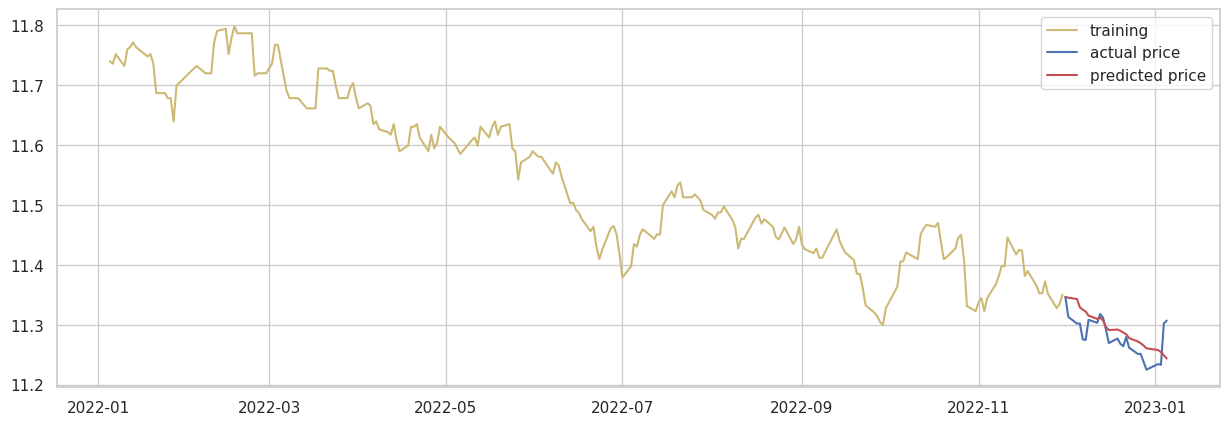

In [140]:
fc = fitted_m5.forecast(len(test_hynix), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index= test_hynix.index)   # 예측결과

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train_hynix, c="y", label='training')
plt.plot(test_hynix, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [141]:
mse = mean_squared_error(np.exp(test_hynix), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_hynix), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_hynix), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_hynix)) / np.abs(np.exp(test_hynix)))
print('MAPE: {:.2f}%'.format(mape * 100))

MSE:  5294314.72829669
MAE:  1877.591825648902
RMSE:  2300.9377932262073
MAPE: 2.38%


# KakaoBank Corp. (323410.KS)

In [168]:
kakao_path = os.getenv('HOME') + '/aiffel/stock_prediction/data/323410.KS.csv'
kakao = pd.read_csv(kakao_path, index_col='Date', parse_dates=True)
kakao

Open     High      Low    Close  Adj Close   Volume
Date                                                              
2022-01-05  57400.0  57400.0  55000.0  55600.0    55600.0  2068038
2022-01-06  55200.0  56700.0  54600.0  56000.0    56000.0  2263007
2022-01-07  55600.0  56200.0  55000.0  55000.0    55000.0  1180315
2022-01-10  54200.0  54400.0  50600.0  51100.0    51100.0  4158580
2022-01-11  50900.0  51200.0  49200.0  49350.0    49350.0  3785349
...             ...      ...      ...      ...        ...      ...
2022-12-29  24850.0  25400.0  23950.0  24300.0    24300.0  1906638
2023-01-02  24450.0  24600.0  24000.0  24150.0    24150.0   971436
2023-01-03  23950.0  24350.0  23150.0  24100.0    24100.0  1989456
2023-01-04  23850.0  25400.0  23750.0  25400.0    25400.0  1904935
2023-01-05  25850.0  27400.0  25800.0  27300.0    27300.0  4915737

[247 rows x 6 columns]

In [169]:
kakao_ts = kakao["Close"]
kakao_ts

Date
2022-01-05    55600.0
2022-01-06    56000.0
2022-01-07    55000.0
2022-01-10    51100.0
2022-01-11    49350.0
               ...   
2022-12-29    24300.0
2023-01-02    24150.0
2023-01-03    24100.0
2023-01-04    25400.0
2023-01-05    27300.0
Name: Close, Length: 247, dtype: float64

In [170]:
kakao_ts.isnull().sum()

0

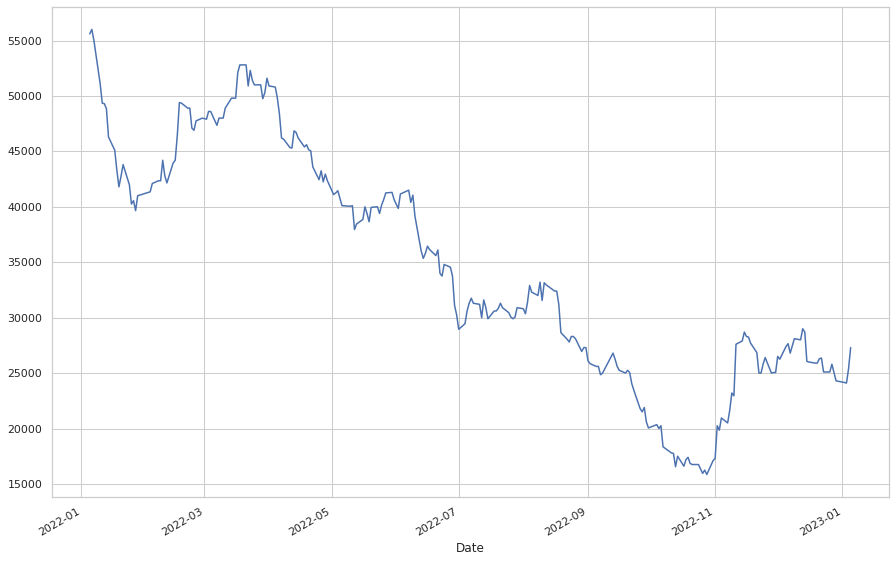

In [171]:
kakao_ts.plot();

In [172]:
kakao_log = np.log(kakao_ts)
kakao_log

Date
2022-01-05    10.925938
2022-01-06    10.933107
2022-01-07    10.915088
2022-01-10    10.841540
2022-01-11    10.806693
                ...    
2022-12-29    10.098232
2023-01-02    10.092040
2023-01-03    10.089967
2023-01-04    10.142504
2023-01-05    10.214642
Name: Close, Length: 247, dtype: float64

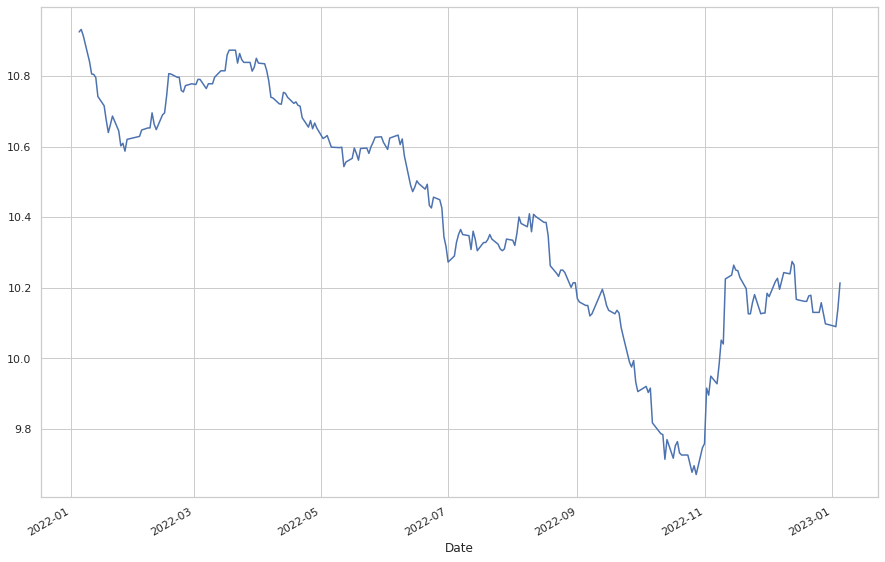

In [173]:
kakao_log.plot();

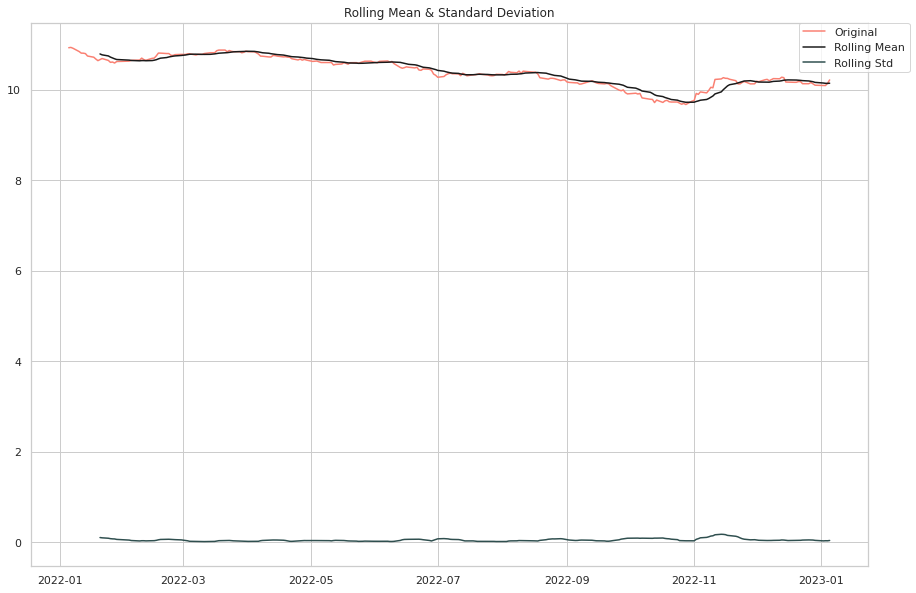

Results of Dickey-Fuller Test:
Test Statistic                  -1.605686
p-value                          0.480737
#Lags Used                       2.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


In [174]:
# 정성적 그래프 분석
plot_rolling_statistics(kakao_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(kakao_log)

#시계열 분해 (Time Series Decomposition)
decomposition = seasonal_decompose(kakao_log, model='multiplicative', period = 30) 

In [175]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

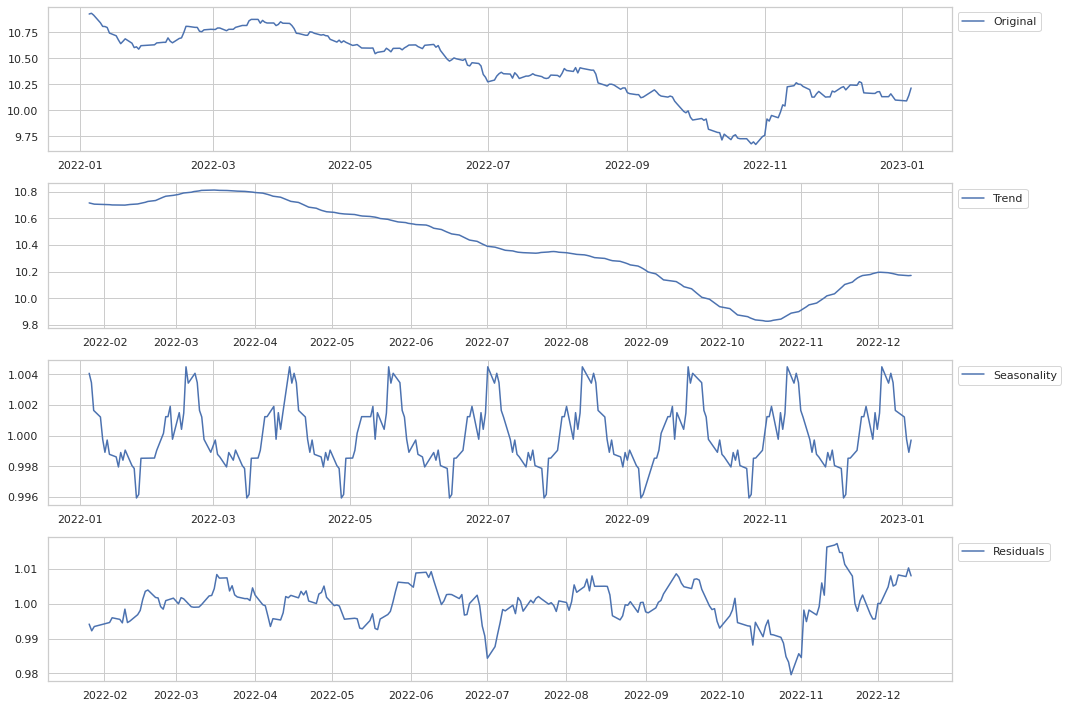

In [176]:
plt.subplot(411)
plt.plot(kakao_log, label='Original')
plt.legend(bbox_to_anchor=(1,1), loc= 2)

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(bbox_to_anchor=(1,1), loc= 2)

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(bbox_to_anchor=(1,1), loc= 2)

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(bbox_to_anchor=(1,1), loc= 2)

plt.tight_layout()

In [177]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.221999
p-value                          0.000605
#Lags Used                       2.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64


In [178]:
train_kakao, test_kakao = kakao_log[:int(len(kakao_log) * 0.9)], kakao_log[int(len(kakao_log) * 0.9):]

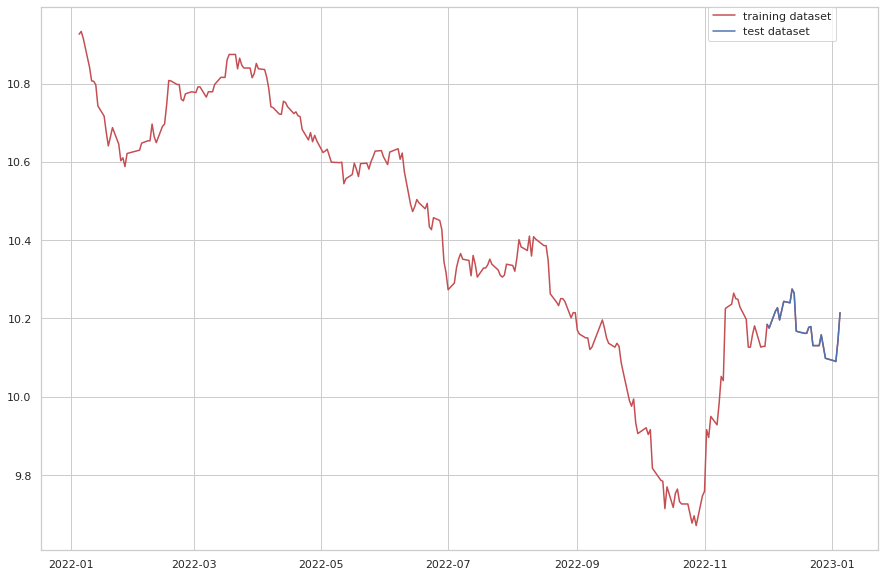

In [179]:
plt.plot(kakao_log, c='r', label='training dataset')  
plt.plot(test_kakao, c='b', label='test dataset')
plt.legend(bbox_to_anchor= (0.95, 1), borderaxespad= 0.);

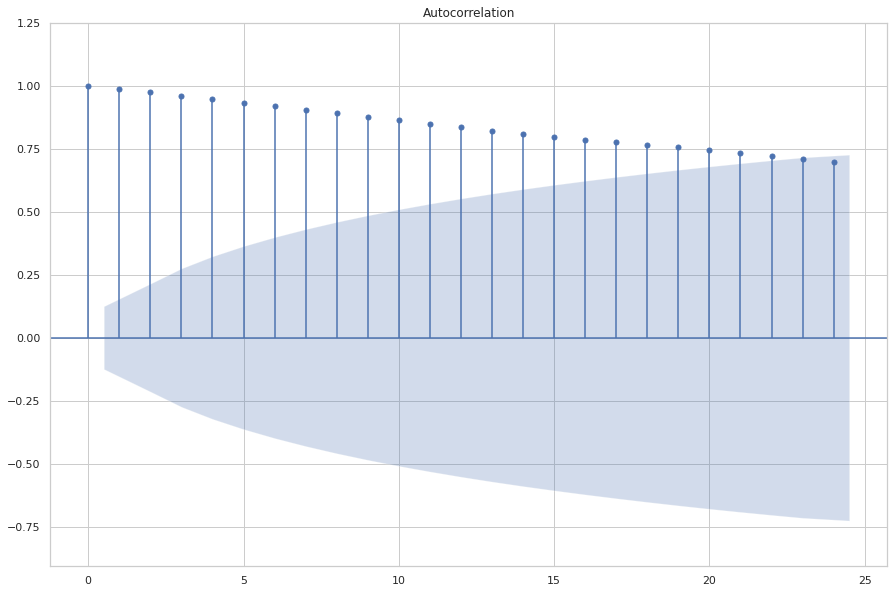

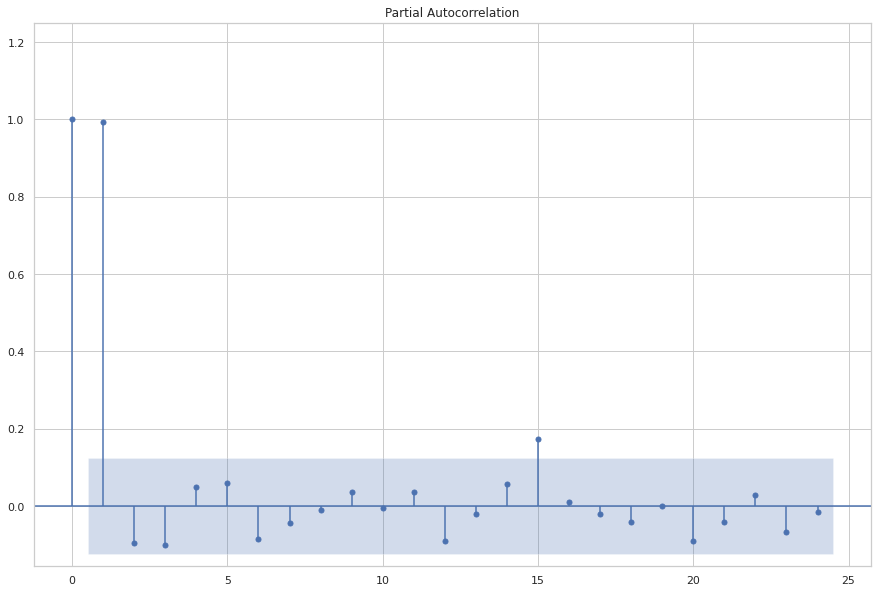

In [180]:
plot_acf(kakao_log, auto_ylims=True)
plot_pacf(kakao_log, auto_ylims=True)
plt.show()

lag 1, 15 -> pacf  
lag 1 ~ 22 -> acf

Results of Dickey-Fuller Test:
Test Statistic                -9.205696e+00
p-value                        1.947701e-15
#Lags Used                     1.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (5%)           -2.873459e+00
Critical Value (10%)          -2.573122e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.867763e+00
p-value                        1.425048e-14
#Lags Used                     7.000000e+00
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64


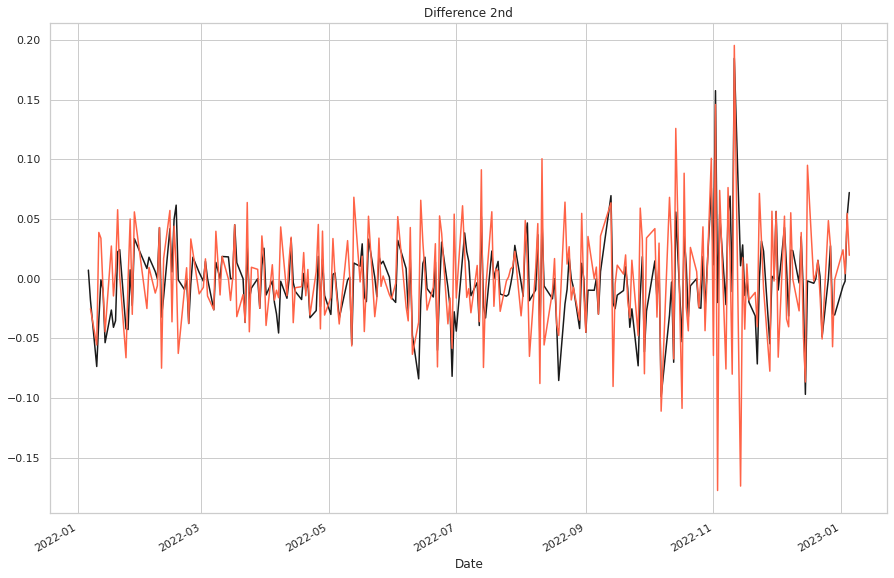

In [181]:
diff_1 = kakao_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st', c= "k")

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd', c= "tomato")

augmented_dickey_fuller_test(diff_2)

In [182]:
res = aarima.fit(train_kakao)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-863.450, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-864.826, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-863.197, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-863.110, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-864.336, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-866.152, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-865.727, Time=0.66 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-865.355, Time=0.63 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-866.661, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-865.506, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-863.360, Time=0.67 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-866.861, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-862.786, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-865.751, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0]          

ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-863.197  
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-862.786

In [183]:
model = ARIMA(train_kakao, order=(1, 0, 0))  
fitted_m = model.fit() 

In [184]:
fitted_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  222
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 432.935
Date:                Thu, 05 Jan 2023   AIC                           -859.871
Time:                        15:11:21   BIC                           -849.663
Sample:                             0   HQIC                          -855.750
                                - 222                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4943      0.277     37.913      0.000       9.952      11.037
ar.L1          0.9958      0.006    174.554      0.000       0.985       1.007
sigma2         0.0012   6.72e-05     17.244      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):               302.98
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               3.04   Skew:                             0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [185]:
model2 = ARIMA(train_kakao, order=(0, 1, 22))  
fitted_m2 = model2.fit()
fitted_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  222
Model:                ARIMA(0, 1, 22)   Log Likelihood                 451.214
Date:                Thu, 05 Jan 2023   AIC                           -856.427
Time:                        15:11:31   BIC                           -778.270
Sample:                             0   HQIC                          -824.869
                                - 222                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0253      0.085      0.298      0.766      -0.141       0.192
ma.L2          0.1236      0.076      1.634      0.102      -0.025       0.272
ma.L3          0.1031      0.069      1.489      0.136      -0.033       0.239
ma.L4         -0.0735      0.076     -0.967      0.334      -0.223       0.076
ma.L5          0.1402      0.076      1.842      0.066      -0.009       0.289
ma.L6          0.0547      0.071      0.769      0.442      -0.085       0.194
ma.L7          0.1886      0.070      2.691      0.007       0.051       0.326
ma.L8          0.0299      0.090      0.333      0.739      -0.146       0.206
ma.L9          0.1280      0.074      1.738      0.082      -0.016       0.272
ma.L10        -0.0237      0.086     -0.275      0.784      -0.193       0.145
ma.L11         0.0601      0.078      0.771      0.440      -0.093       0.213
ma.L12        -0.0032      0.076     -0.042      0.967      -0.152       0.146
ma.L13         0.0926      0.073      1.260      0.208      -0.051       0.237
ma.L14        -0.1344      0.080     -1.686      0.092      -0.291       0.022
ma.L15        -0.0540      0.076     -0.711      0.477      -0.203       0.095
ma.L16        -0.0927      0.088     -1.056      0.291      -0.265       0.079
ma.L17        -0.1959      0.076     -2.586      0.010      -0.344      -0.047
ma.L18         0.0557      0.077      0.720      0.472      -0.096       0.207
ma.L19         0.1313      0.089      1.482      0.138      -0.042       0.305
ma.L20         0.1083      0.068      1.597      0.110      -0.025       0.241
ma.L21        -0.1284      0.076     -1.689      0.091      -0.277       0.021
ma.L22        -0.0571      0.085     -0.672      0.501      -0.223       0.109
sigma2         0.0010   9.85e-05      9.854      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                25.41
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.58   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [186]:
model3 = ARIMA(train_kakao, order=(15, 1, 0))  
fitted_m3 = model3.fit()
fitted_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  222
Model:                ARIMA(15, 1, 0)   Log Likelihood                 448.629
Date:                Thu, 05 Jan 2023   AIC                           -865.258
Time:                        15:11:34   BIC                           -810.887
Sample:                             0   HQIC                          -843.304
                                - 222                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0290      0.084      0.346      0.730      -0.135       0.193
ar.L2          0.1142      0.076      1.502      0.133      -0.035       0.263
ar.L3          0.1014      0.068      1.494      0.135      -0.032       0.235
ar.L4         -0.0776      0.065     -1.187      0.235      -0.206       0.051
ar.L5          0.0861      0.070      1.223      0.221      -0.052       0.224
ar.L6          0.0228      0.076      0.300      0.765      -0.126       0.172
ar.L7          0.1859      0.058      3.186      0.001       0.072       0.300
ar.L8          0.0256      0.087      0.292      0.770      -0.146       0.197
ar.L9          0.0804      0.066      1.219      0.223      -0.049       0.210
ar.L10        -0.0636      0.075     -0.848      0.396      -0.210       0.083
ar.L11         0.0660      0.066      1.004      0.316      -0.063       0.195
ar.L12        -0.0227      0.067     -0.340      0.734      -0.154       0.108
ar.L13         0.0311      0.077      0.406      0.684      -0.119       0.181
ar.L14        -0.2804      0.071     -3.956      0.000      -0.419      -0.141
ar.L15        -0.0429      0.087     -0.494      0.621      -0.213       0.127
sigma2         0.0010   9.75e-05     10.279      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                47.06
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.71   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [187]:
model4 = ARIMA(train_kakao, order=(15, 2, 0))  
fitted_m4 = model4.fit()
fitted_m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  222
Model:                ARIMA(15, 2, 0)   Log Likelihood                 437.731
Date:                Thu, 05 Jan 2023   AIC                           -843.463
Time:                        15:11:37   BIC                           -789.165
Sample:                             0   HQIC                          -821.536
                                - 222                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.085    -10.610      0.000      -1.062      -0.731
ar.L2         -0.7240      0.101     -7.156      0.000      -0.922      -0.526
ar.L3         -0.5789      0.107     -5.432      0.000      -0.788      -0.370
ar.L4         -0.6170      0.111     -5.572      0.000      -0.834      -0.400
ar.L5         -0.4815      0.125     -3.838      0.000      -0.727      -0.236
ar.L6         -0.4195      0.132     -3.175      0.001      -0.678      -0.161
ar.L7         -0.1995      0.133     -1.501      0.133      -0.460       0.061
ar.L8         -0.1502      0.135     -1.116      0.264      -0.414       0.114
ar.L9         -0.0333      0.124     -0.268      0.789      -0.276       0.210
ar.L10        -0.0556      0.136     -0.410      0.682      -0.322       0.210
ar.L11         0.0570      0.140      0.407      0.684      -0.217       0.331
ar.L12         0.0699      0.133      0.525      0.600      -0.191       0.331
ar.L13         0.1447      0.115      1.261      0.207      -0.080       0.370
ar.L14        -0.0729      0.107     -0.684      0.494      -0.282       0.136
ar.L15        -0.0318      0.080     -0.397      0.691      -0.189       0.125
sigma2         0.0011      0.000      9.934      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                18.57
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

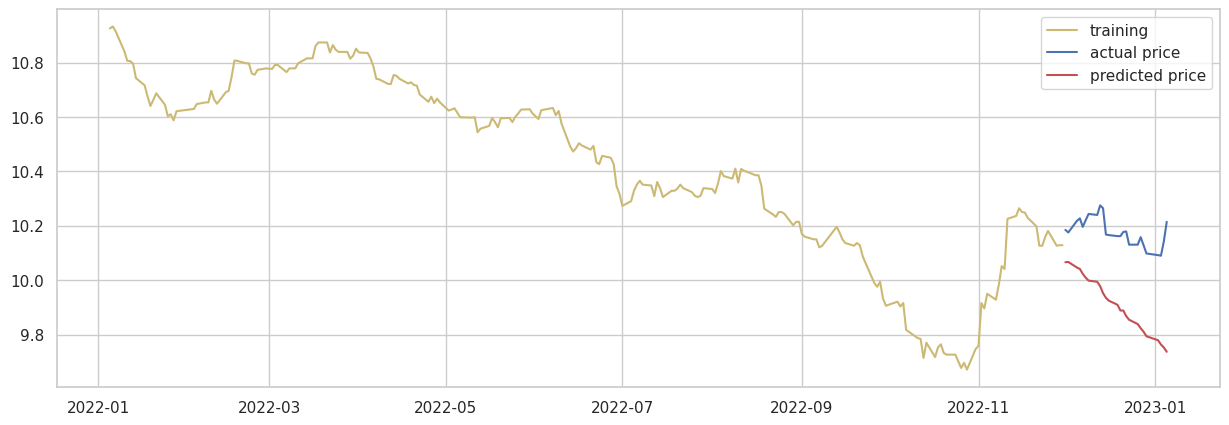

In [191]:
fc = fitted_m4.forecast(len(test_kakao), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index= test_kakao.index)   # 예측결과

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train_kakao, c="y", label='training')
plt.plot(test_kakao, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

푸에엥...아프다..

In [189]:
mse = mean_squared_error(np.exp(test_kakao), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_kakao), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_kakao), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_kakao)) / np.abs(np.exp(test_kakao)))
print('MAPE: {:.2f}%'.format(mape * 100))

MSE:  39892832.01526516
MAE:  6114.865153822224
RMSE:  6316.07726482705
MAPE: 23.28%


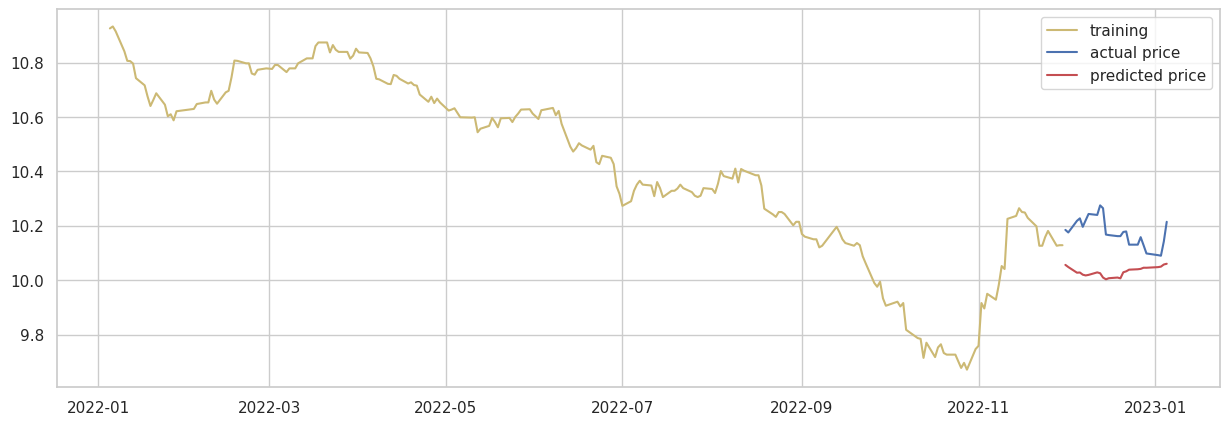

In [192]:
fc = fitted_m3.forecast(len(test_kakao), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index= test_kakao.index)   # 예측결과

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train_kakao, c="y", label='training')
plt.plot(test_kakao, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

조아조아

In [193]:
mse = mean_squared_error(np.exp(test_kakao), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_kakao), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_kakao), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_kakao)) / np.abs(np.exp(test_kakao)))
print('MAPE: {:.2f}%'.format(mape * 100))

MSE:  15313303.289501548
MAE:  3602.569044062259
RMSE:  3913.2215998460333
MAPE: 13.42%


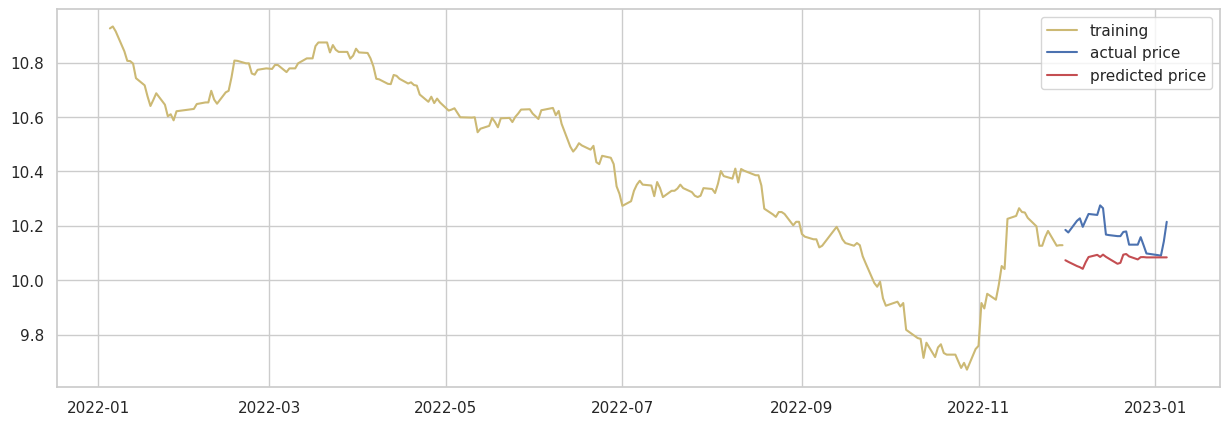

In [194]:
fc = fitted_m2.forecast(len(test_kakao), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index= test_kakao.index)   # 예측결과

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train_kakao, c="y", label='training')
plt.plot(test_kakao, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

조금만 더 힘쓰라구!

In [195]:
mse = mean_squared_error(np.exp(test_kakao), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_kakao), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_kakao), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_kakao)) / np.abs(np.exp(test_kakao)))
print('MAPE: {:.2f}%'.format(mape * 100))

MSE:  8442842.712767119
MAE:  2542.0801139713626
RMSE:  2905.657019120997
MAPE: 9.41%


In [196]:
model6 = ARIMA(train_kakao, order=(0, 1, 1))  
fitted_m6 = model6.fit()

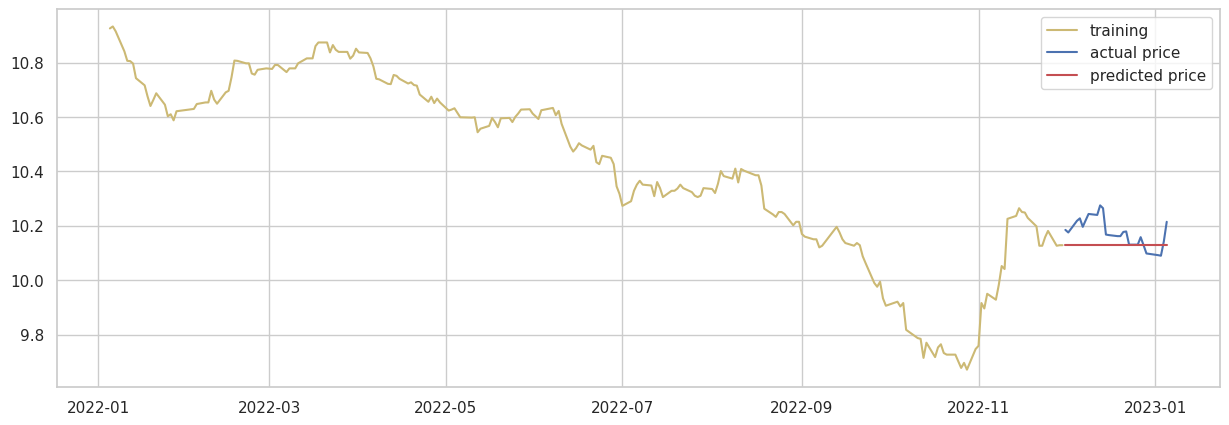

In [197]:
fc = fitted_m6.forecast(len(test_kakao), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index= test_kakao.index)   # 예측결과

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train_kakao, c="y", label='training')
plt.plot(test_kakao, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [198]:
mse = mean_squared_error(np.exp(test_kakao), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_kakao), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_kakao), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_kakao)) / np.abs(np.exp(test_kakao)))
print('MAPE: {:.2f}%'.format(mape * 100))

MSE:  3448617.479195241
MAE:  1504.1224014178556
RMSE:  1857.0453627187574
MAPE: 5.54%


급변하는 그래프에서는 AIC 값이 음수라면 더 낮은 값이 잘 맞는듯...

# 회고

P.S